Project Members:                                                  
- Daniel Arday
- Kevin Akman
- Albert Chen

Date:  10/23/2023


### Final Requirements - for our rerefence as we complete the assignment

Technical Report: One PDF document with your final technical report. This should describe your preparation and analysis of the data, discuss the final model selection, and describe the statistics behind your final model selection.

# Introduction

The UCI Computer Hardward dataset (https://archive.ics.uci.edu/dataset/29/computer+hardware) was created by Jacob Feldmesser to compare relative CPU Performance Data, described in terms of its cycle time, memory size, and other metrics for the paper "Attributes of the performance of central processing units: a relative performance prediction model" ( Ein-Dor & Feldmesser, 1987). In this article, the authors determined the estimated relative performance values utilizing a linear regression method. Refer to pages 308-313 of their publication for a detailed explanation of how the relative performance values were established (https://archive.ics.uci.edu/dataset/29/computer+hardware, 2023).


### Objective

**Our goal with analyzing this dataset is to create a linear regression model to estimate relative CPU performance values.**

### Data Description/Attribuite Information
   1. `Vendor Name`: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. `Model Name`: many unique symbols
   3. `MYCT`: machine cycle time in nanoseconds (integer)
   4. `MMIN`: minimum main memory in kilobytes (integer)
   5. `MMAX`: maximum main memory in kilobytes (integer)
   6. `CACH`: cache memory in kilobytes (integer)
   7. `CHMIN`: minimum channels in units (integer)
   8. `CHMAX`: maximum channels in units (integer)
   9. `PRP`: published relative performance (integer)
   10. `ERP`: estimated relative performance from the original article (integer)

### Loading libraries and  Understanding the data

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# to do mathematical computations
import math
# To build linear model for prediction
from sklearn.linear_model import LinearRegression
# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('machine.csv', sep=',')
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 209 rows and 10 columns.


In [3]:
data.head(10)

,VendorName,ModelName,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


### Initial Observation: This csv does not include a row for the Data Labes, so we will need to add that in.

In [4]:
#Adding in the Attribute Information
data.attrs['info'] = {
    'Vendor Name': 'Text',
    'Model Name': 'Numeric',
    'MYCT': 'Numeric',
    'MMIN': 'Numeric',
    'CACH': 'Numeric',
    'CHMIN': 'Numeric',
    'CHMAX': 'Numeric',
    'CHMAX': 'Numeric',
    'PRP': 'Numeric',
    'ERP': 'Numeric'
}

In [5]:
data.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


Let's add the necessary columns to the dataset

In [6]:
# Attribute Information Row
attribute_info = ['Vendor Name','Model Name','MYCT','MMAX','MMIN','CACH','CHMIN','CHMAX','PRP','ERP']
data.columns = attribute_info
data.head(1)

,Vendor Name,Model Name,MYCT,MMAX,MMIN,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199


MCYT:   17   1500  203.8   260.3   -0.3071
   MMIN:   64   32000 2868.0  3878.7   0.7949
   MMAX:   64   64000 11796.1 11726.6  0.8630
   CACH:   0    256   25.2    40.6     0.6626
   CHMIN:  0    52    4.7     6.8      0.6089
   CHMAX:  0    176   18.2    26.0     0.6052
   PRP:    6    1150  105.6   160.8    1.0000
   ERP: 

Now that we've added the columns let's make a working copy, and see the statistics

In [7]:
df = data.copy()
df

,Vendor Name,Model Name,MYCT,MMAX,MMIN,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMAX,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMIN,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMAX         209 non-null    int64 
 4   MMIN         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


# Data Cleaning & Preparation

### Dealing with Missing Values

In [10]:
df.isnull().sum()

Vendor Name    0
Model Name     0
MYCT           0
MMAX           0
MMIN           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

No missing values, so no intepolation is needed.

### Note

We MAY need to do one-hot encoding so that our model can learn from the Vendor Name and Model Name

# Exploratory Data Analysis

Here are some useful Functions to be used for Data Analysis

In [11]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category
        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
    
# function to plot a boxplot and a histogram along the same scale.
def boxplot_and_histogram(data, feature, figsize=(12, 7), kde=False, bins=None):
    '''    
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    '''
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot( data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2 )  # For histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

## Univariate analysis

### Vendor Name

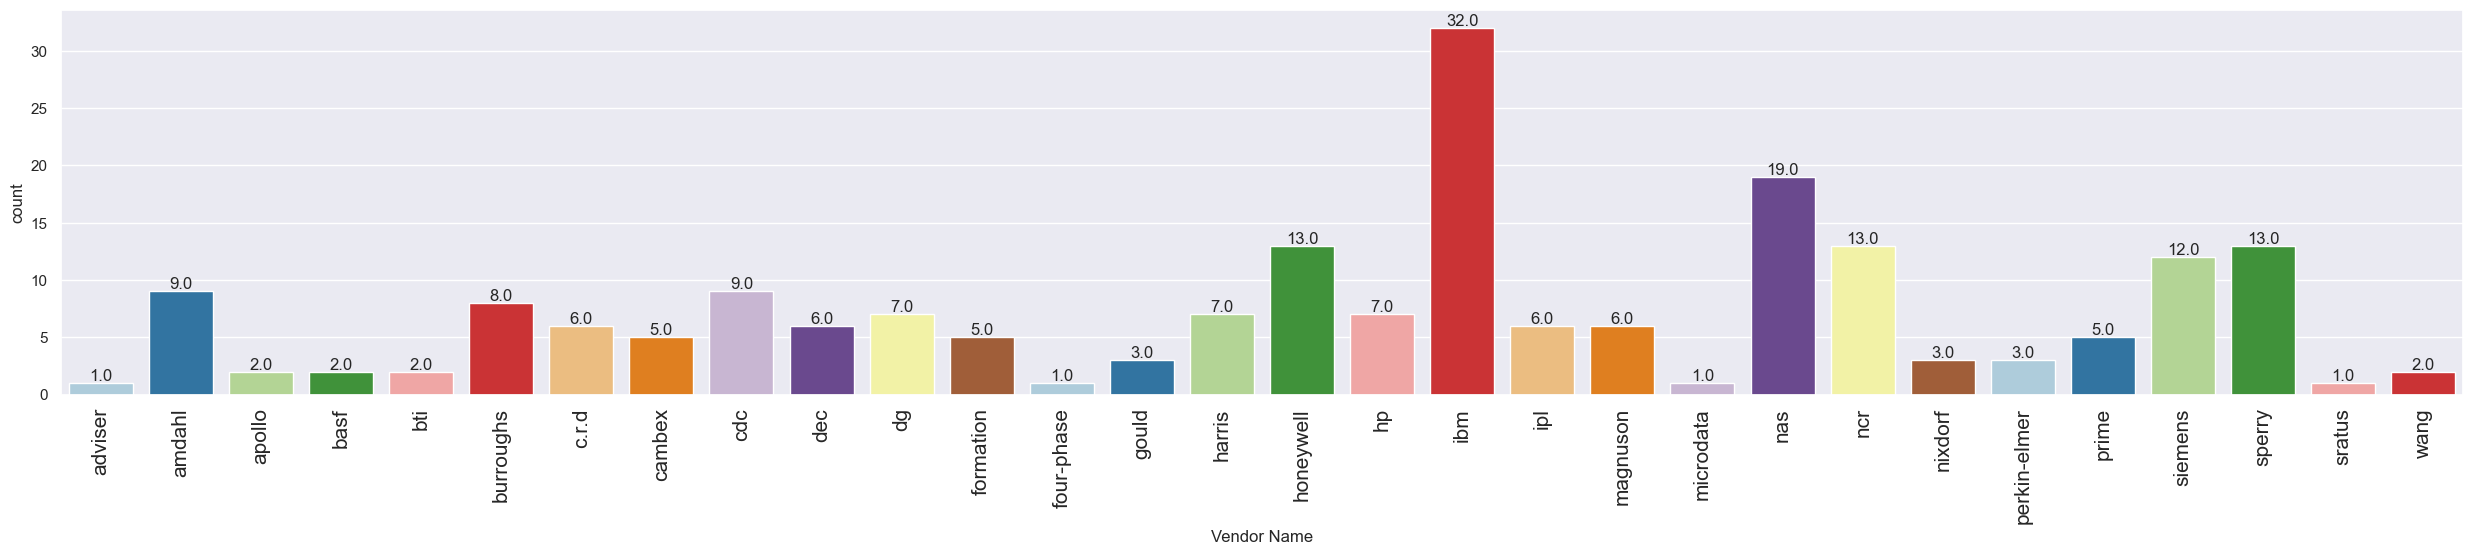

In [12]:
labeled_barplot(df, "Vendor Name")

**Obsevations**

TODO: *Please write about your observations*

### Model Name

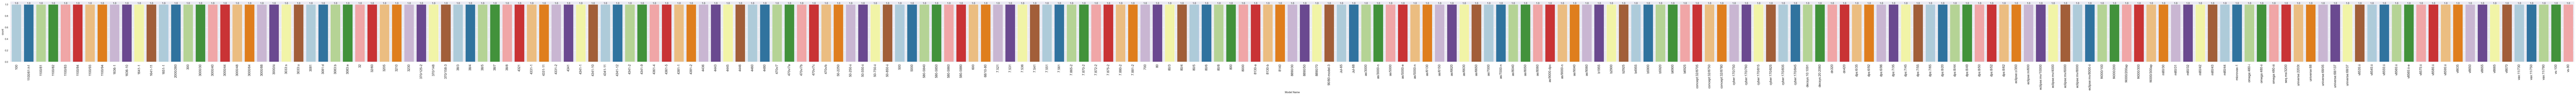

In [13]:
labeled_barplot(df, "Model Name")

**Observations**

TODO: *Please write about your observations*

### MYCT

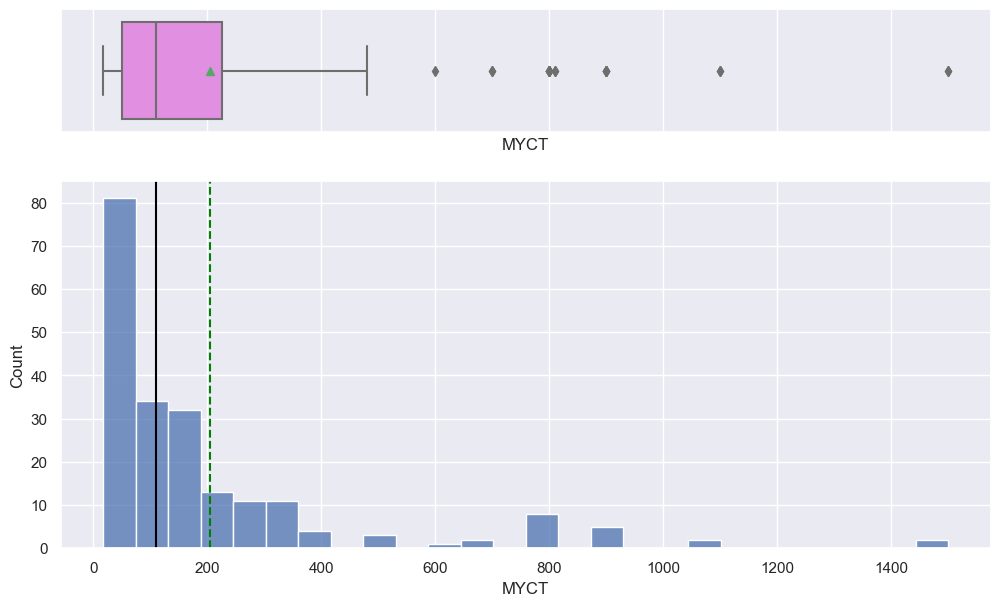

In [14]:
boxplot_and_histogram(df, "MYCT")

#### Observations on MYCT
- Heavily skewed to the right

### TODO: Please complete observations on the following columns

- 'MYCT'
- 'MMAX'
- 'MMIN'
- 'CACH'
- 'CHMIN'
- 'CHMAX'
- 'PRP'
- 'ERP'

### Don't Worry about the Bivariate Analysis for now. Just the observations on Univerate Analysis Above

## Bivariate analysis

### Heat Map

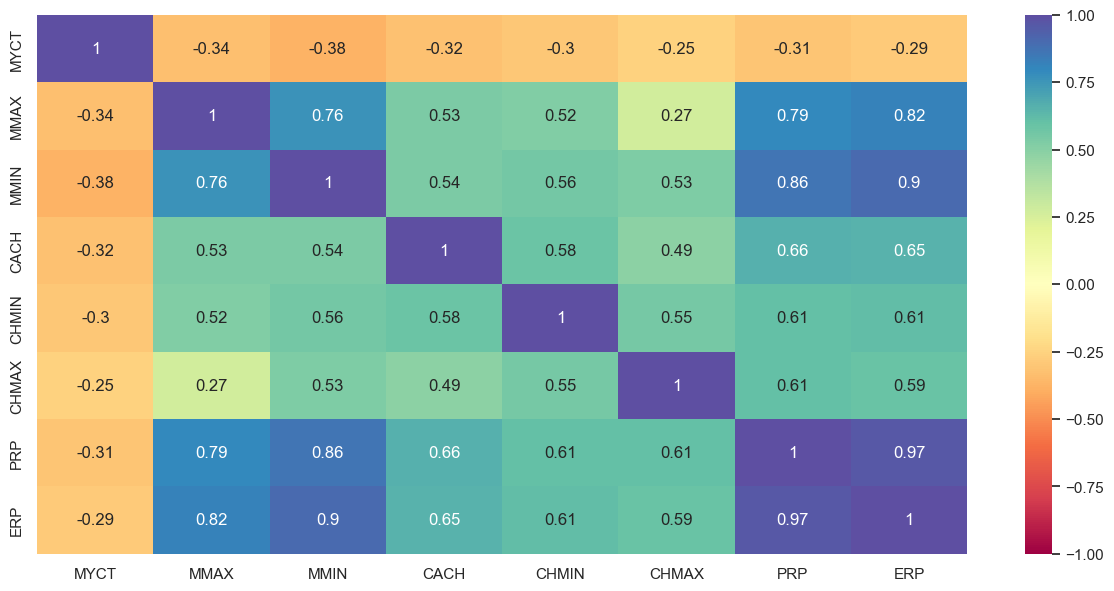

In [15]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

### Pairplot

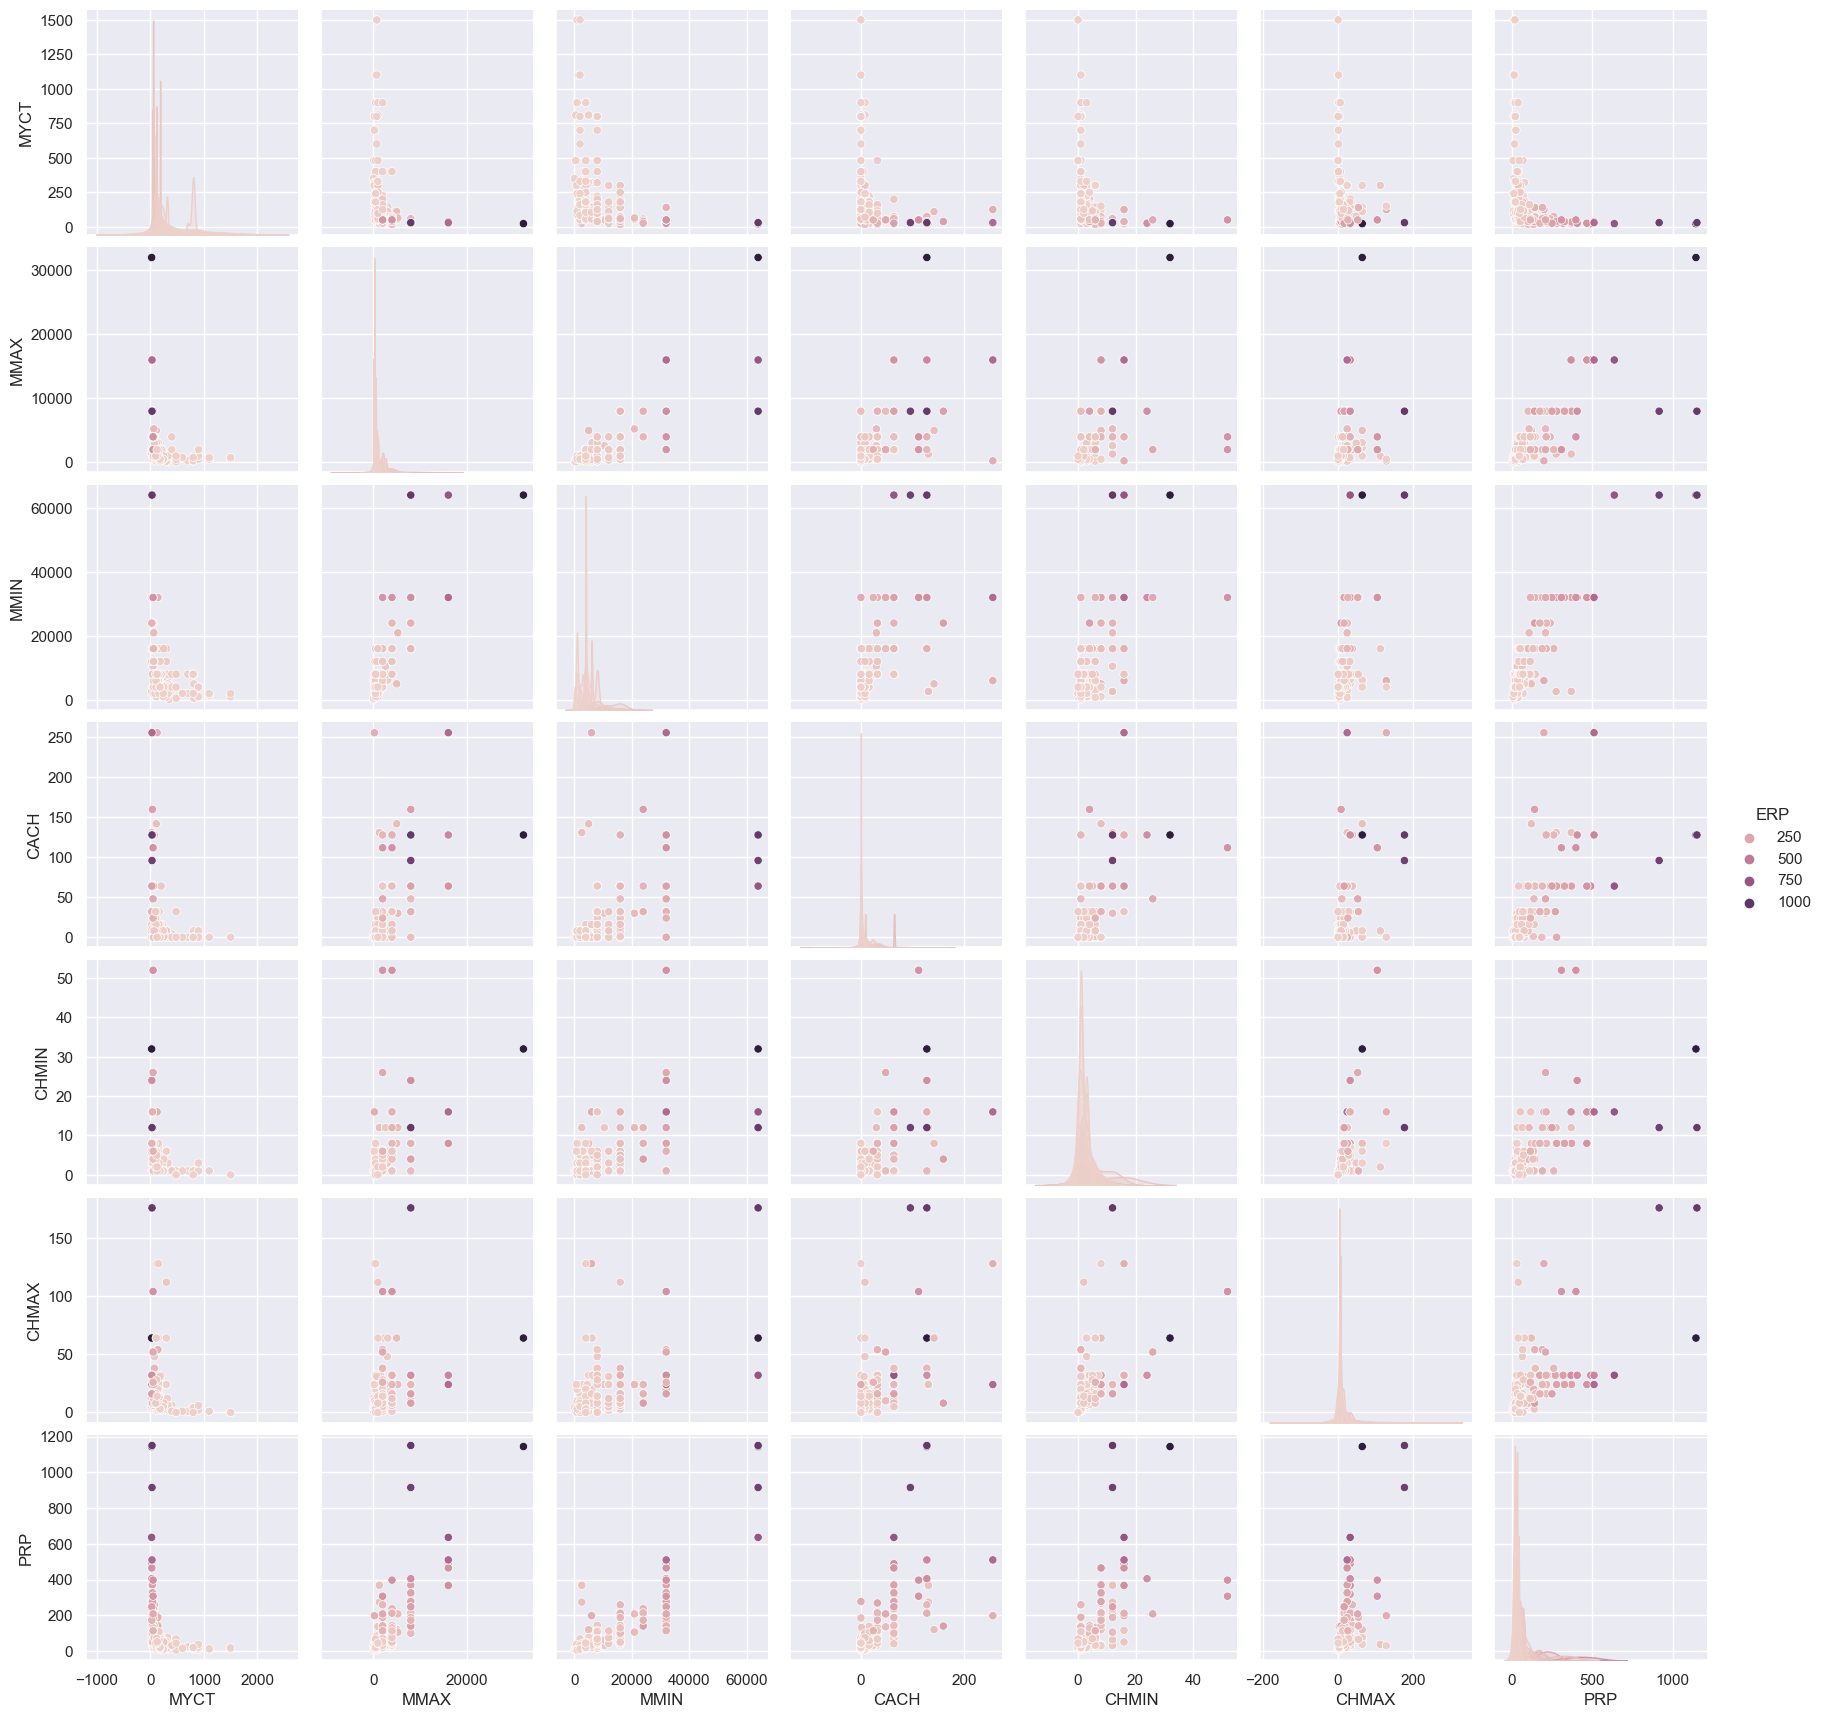

In [16]:
sns.pairplot(data=df,hue="ERP")
plt.show()

### Boxplots of Each Column vs Estimated Rate of Performance (ERP)

In [17]:
### Function to plot boxplot
def boxplot(x):
    plt.figure(figsize=(45,40))
    sns.boxplot(data=data, x="ERP",y=data[x],palette="rocket")
    plt.show()

Vendor Name


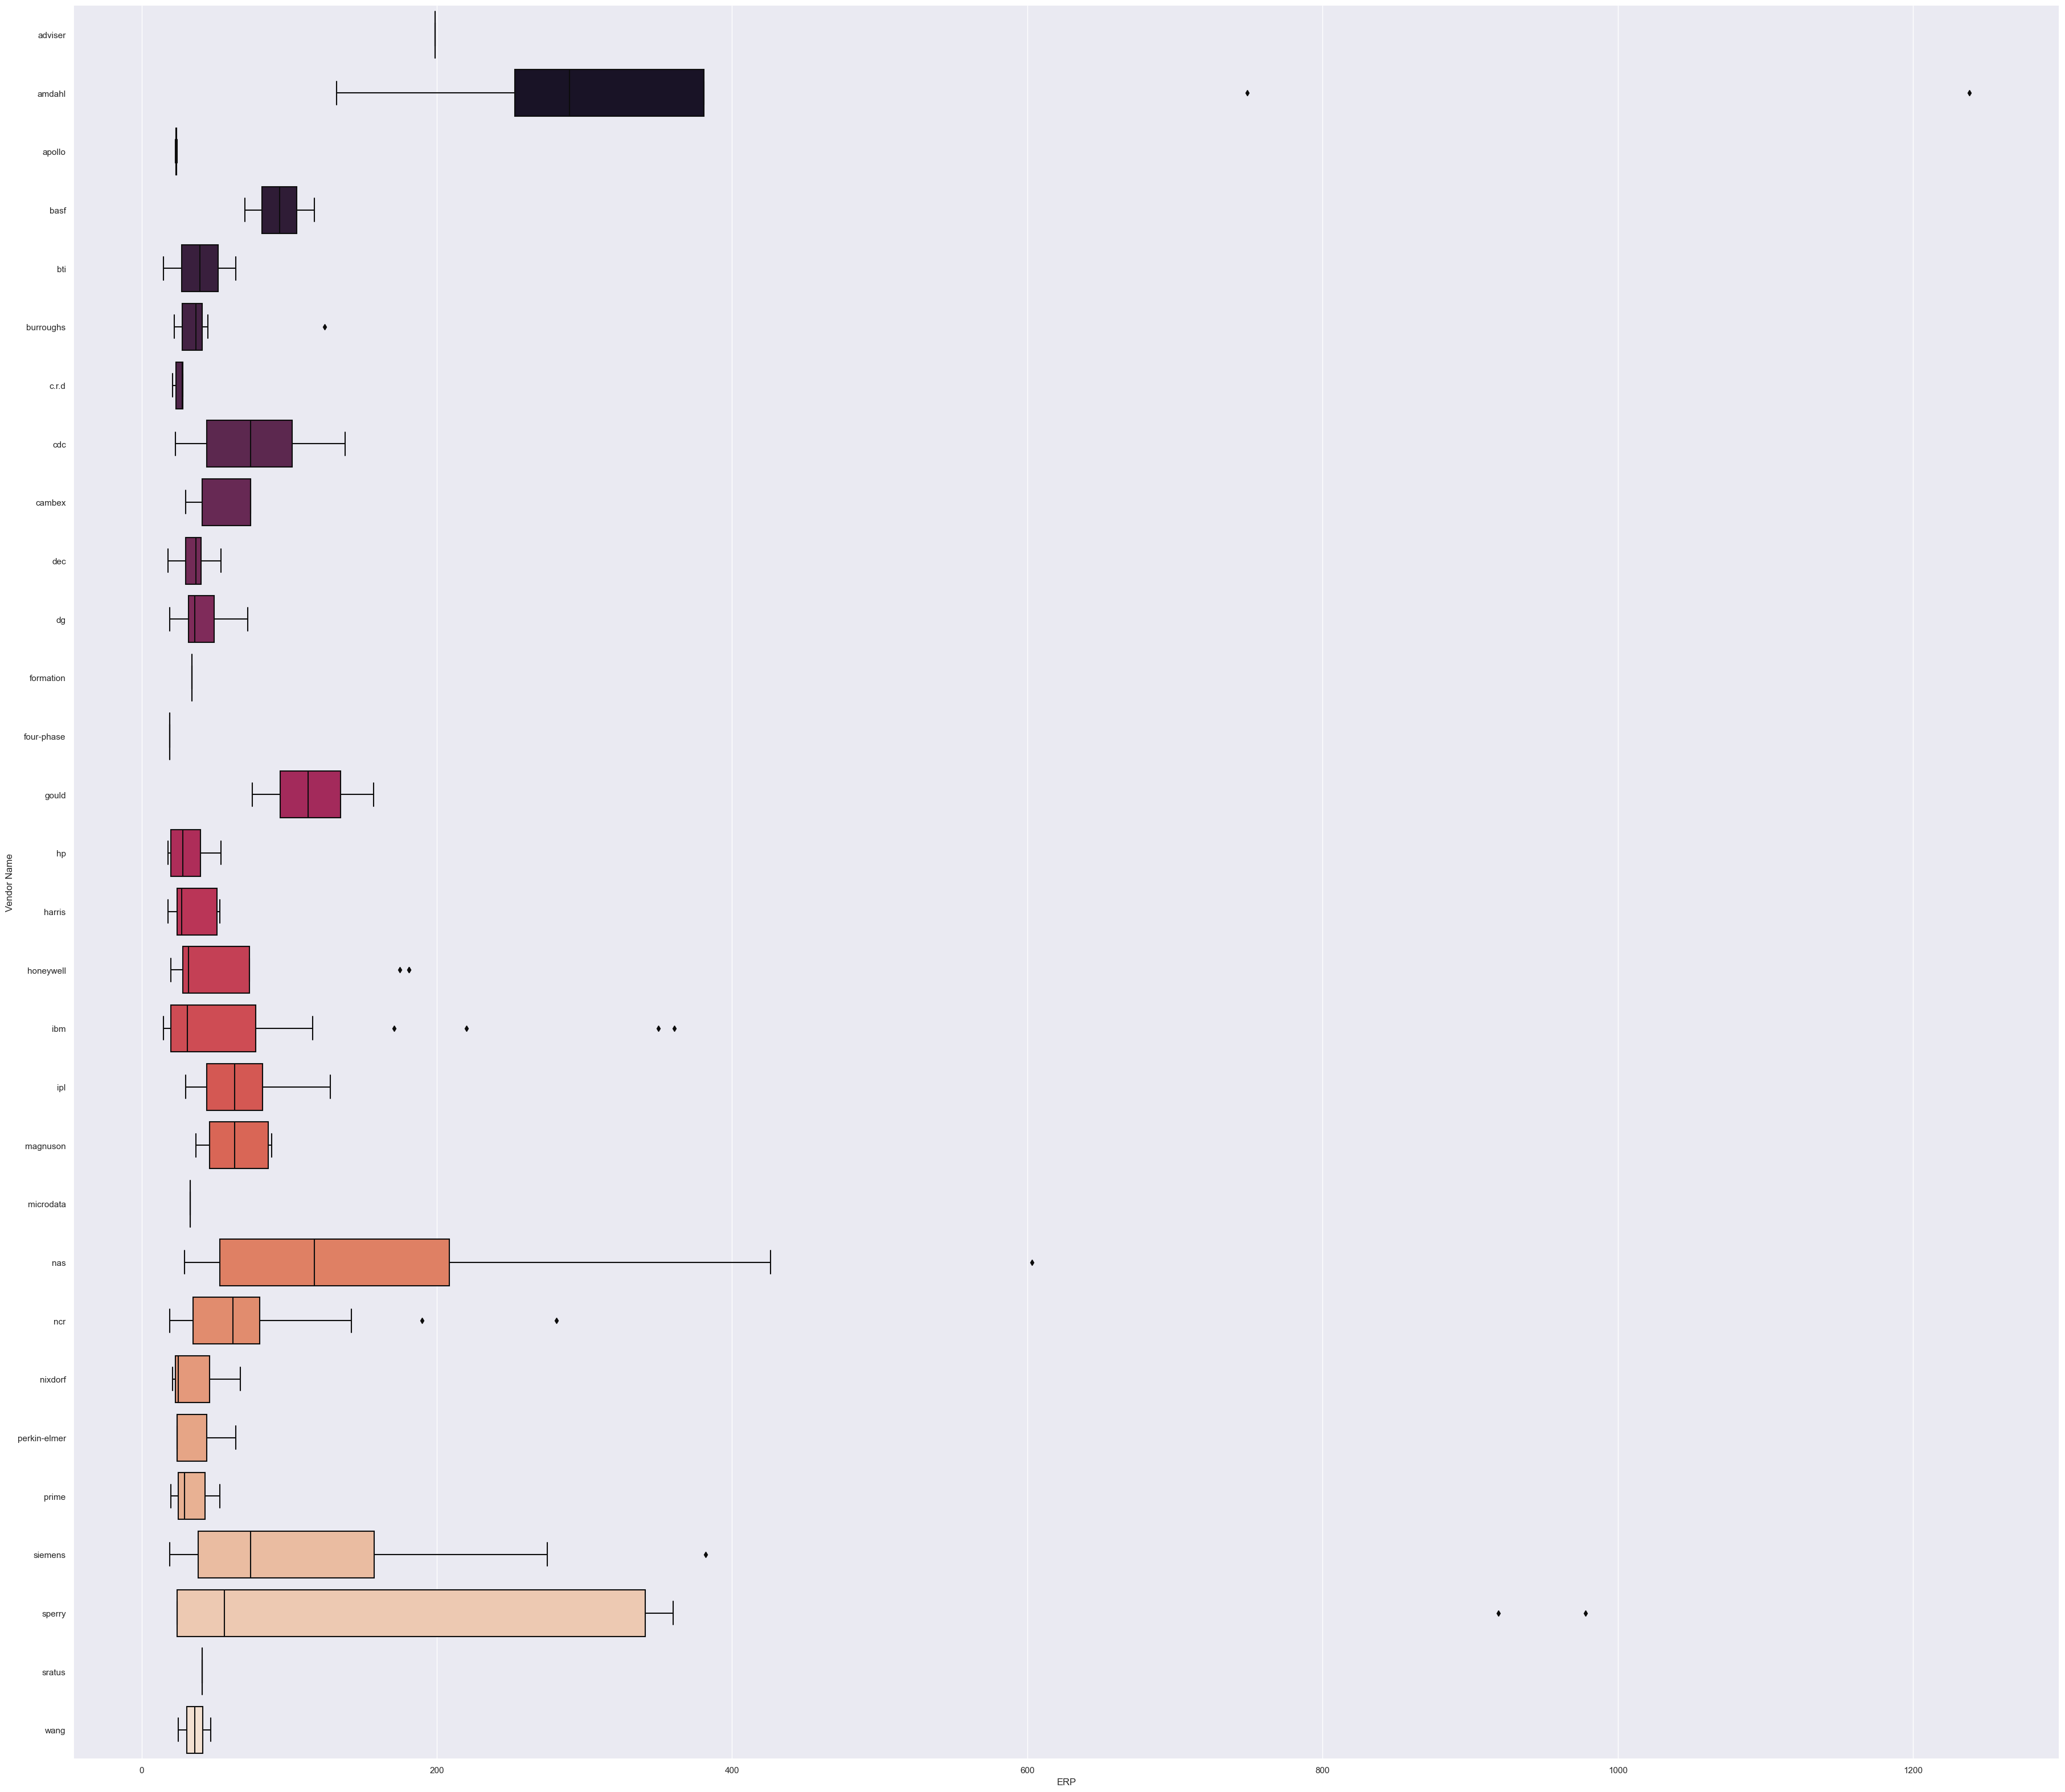

Model Name


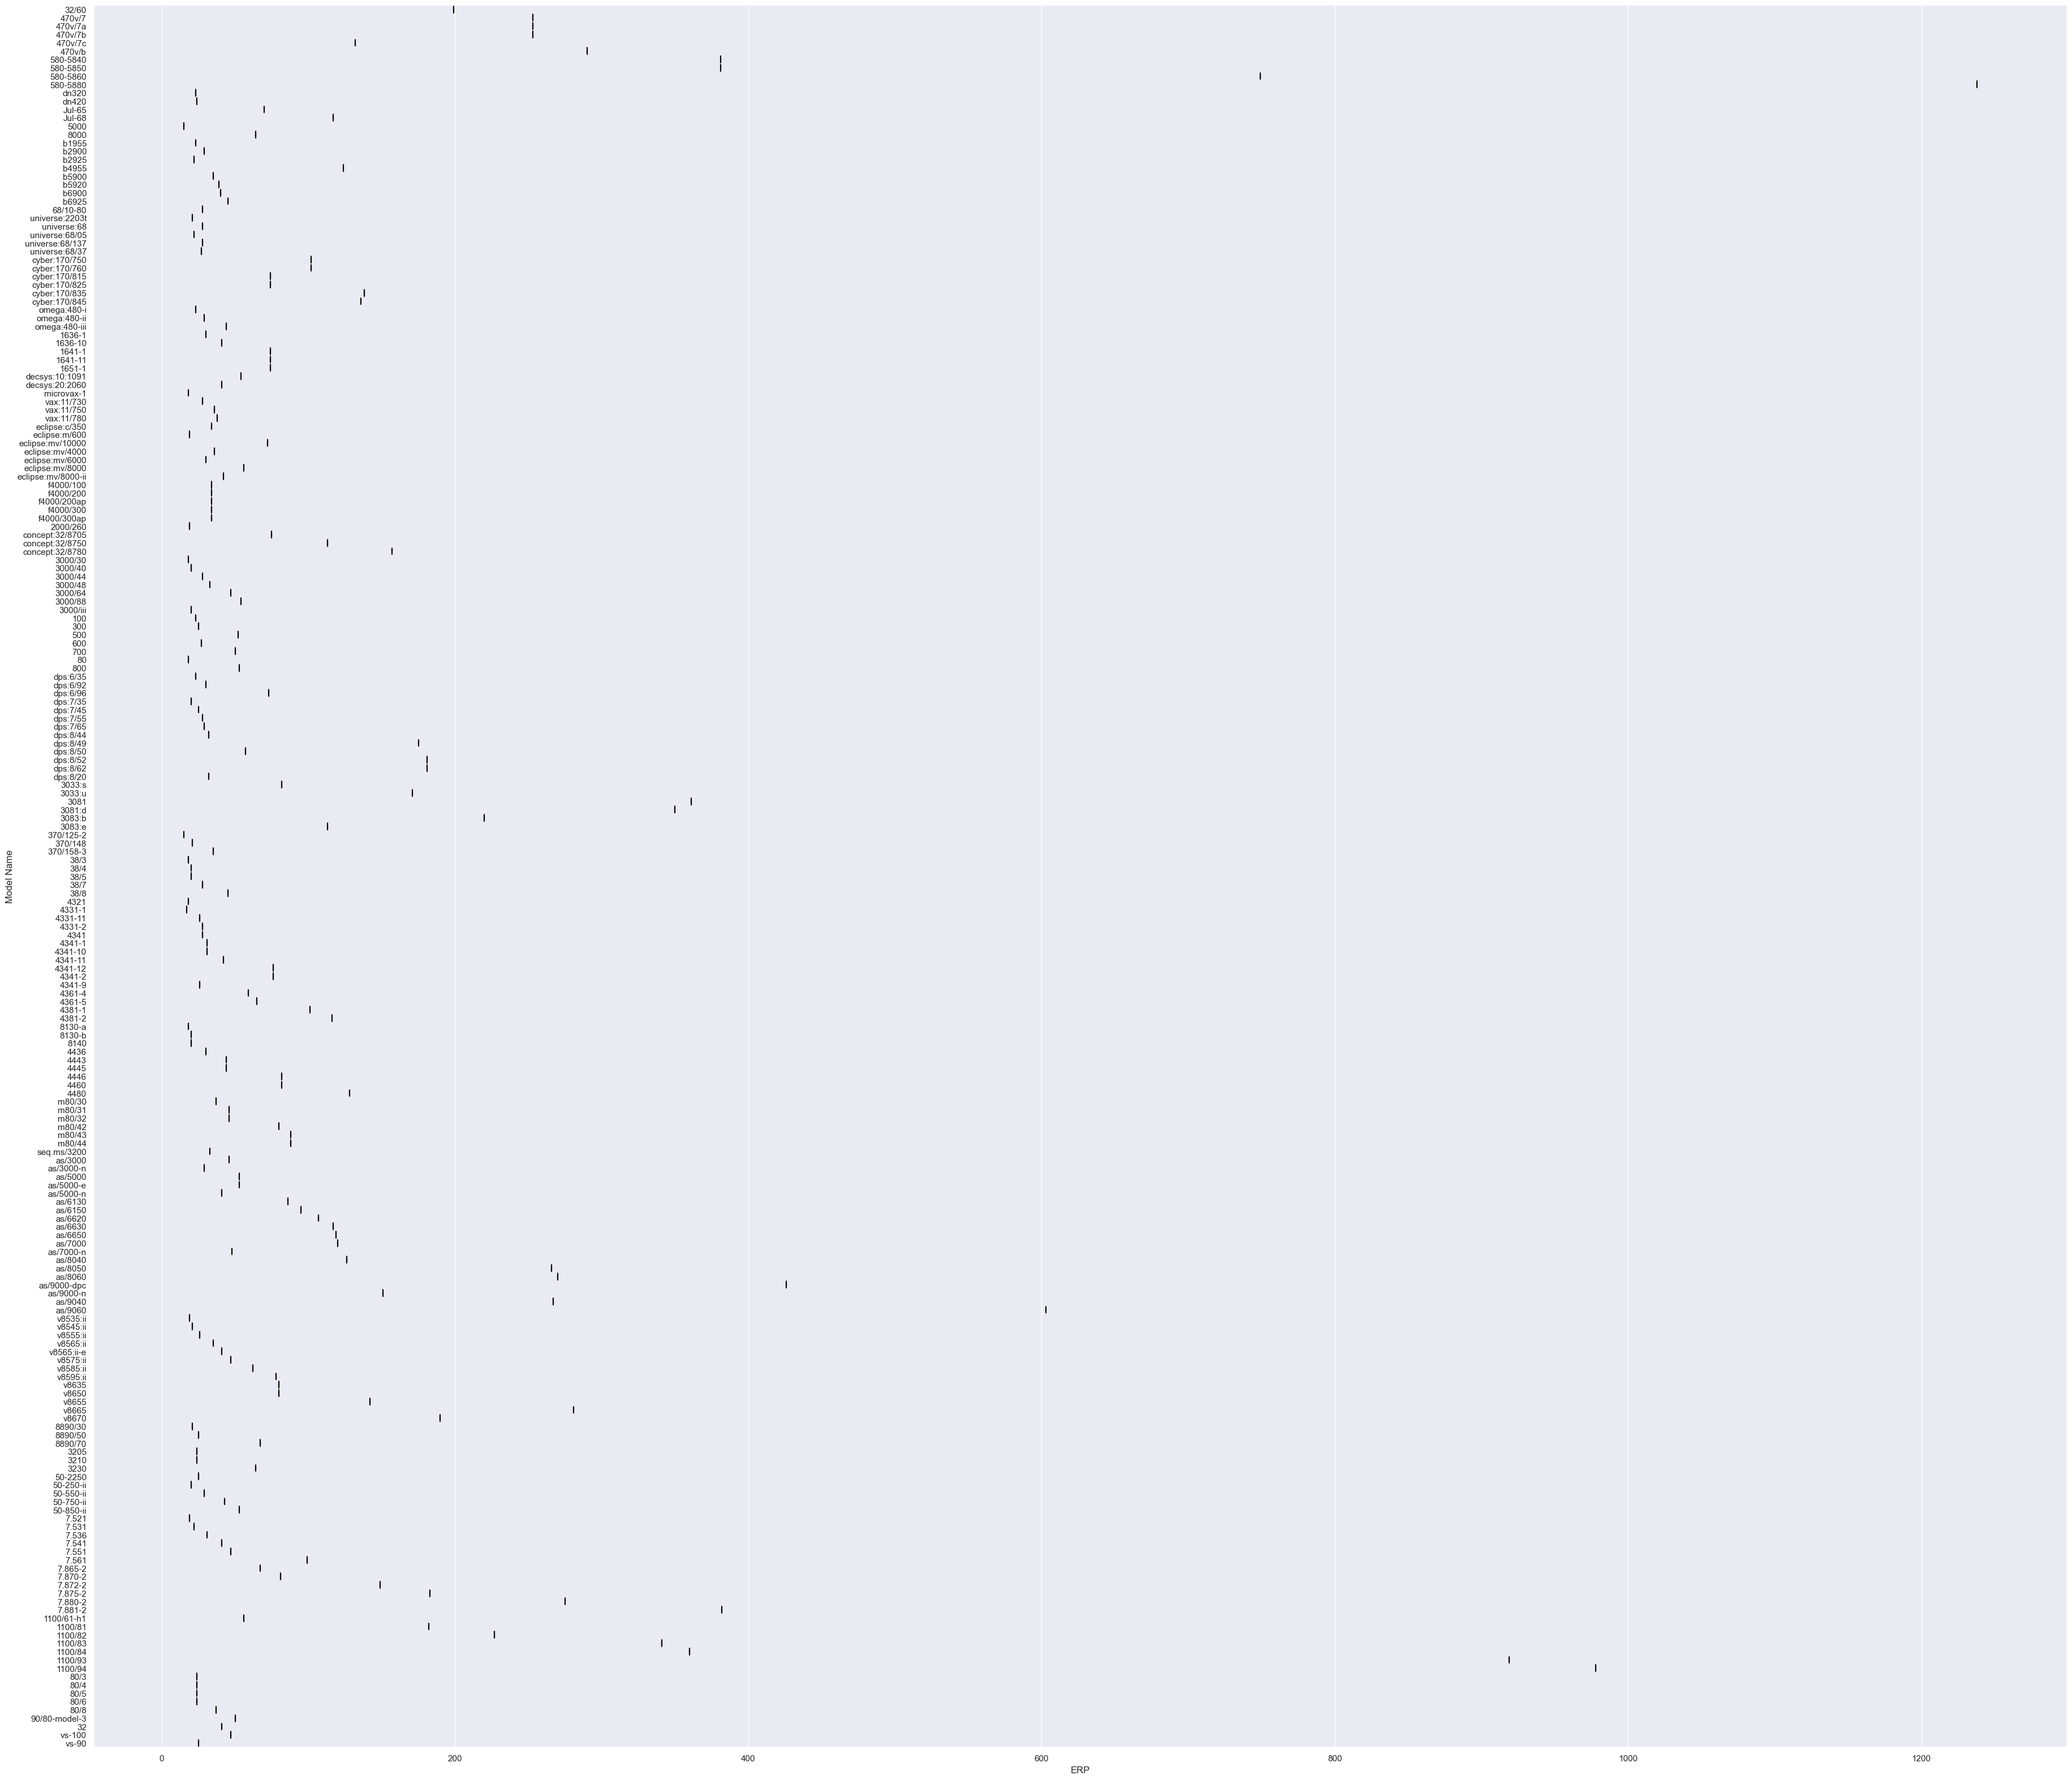

MYCT


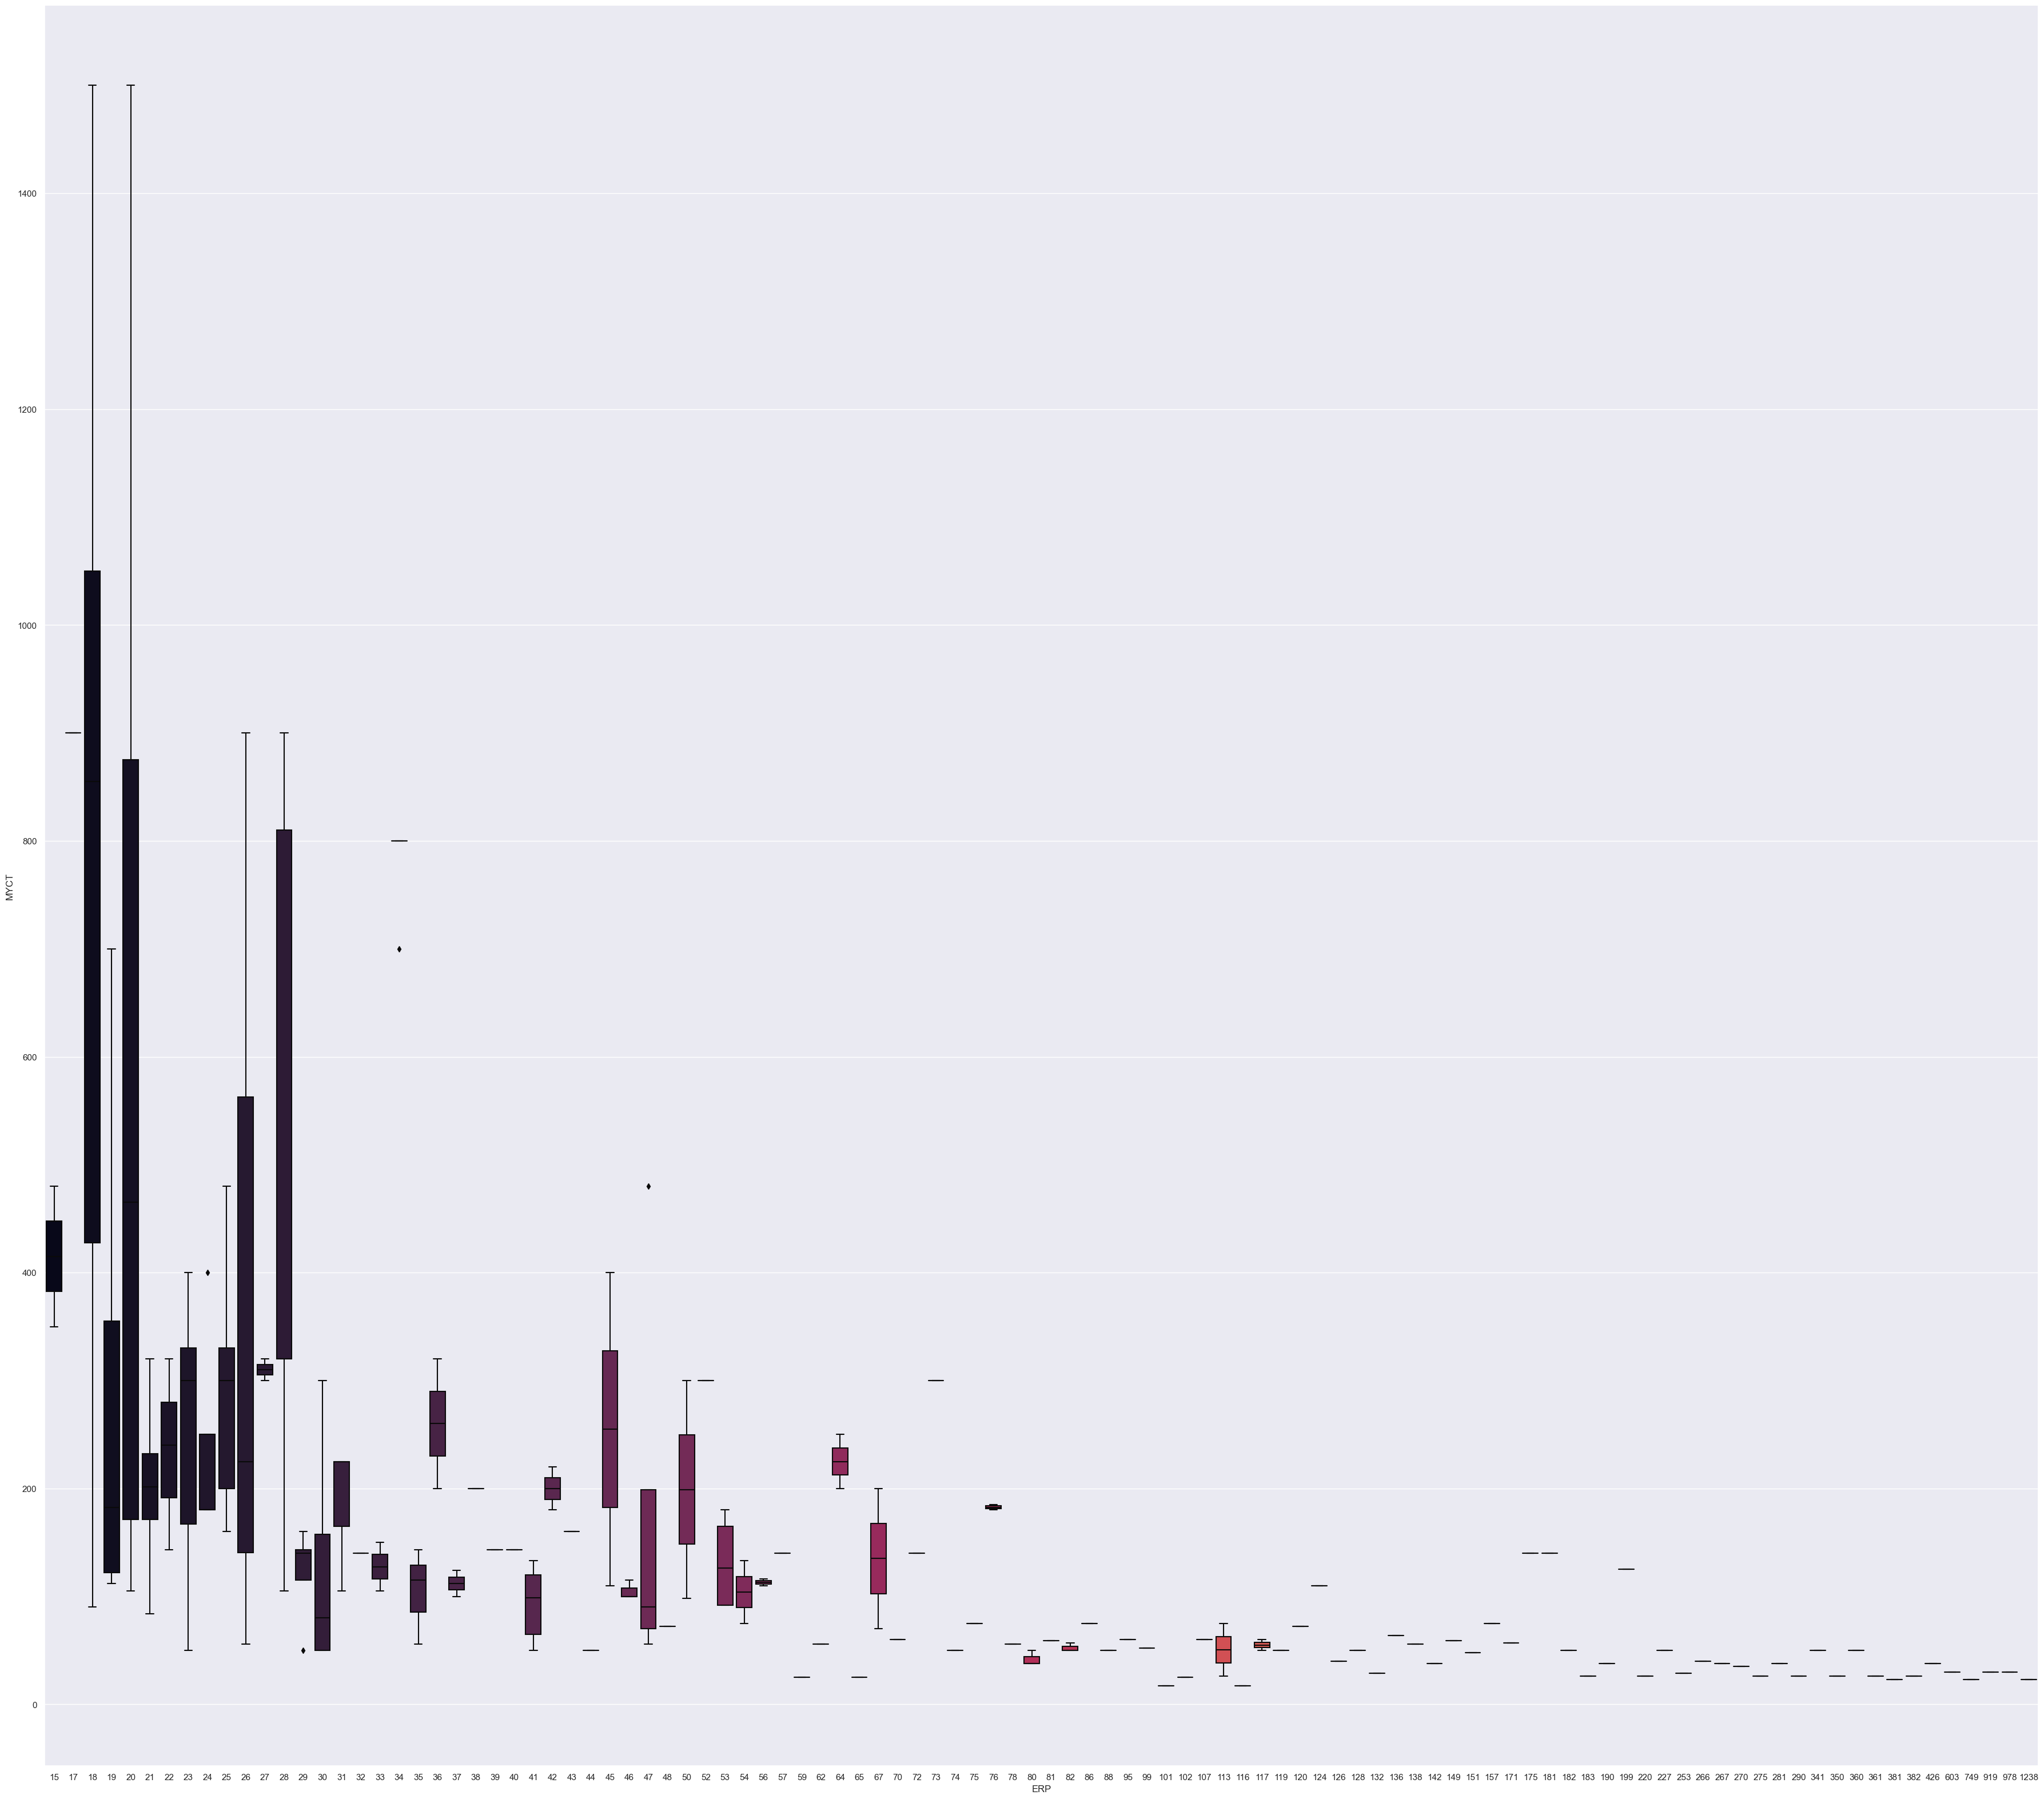

MMAX


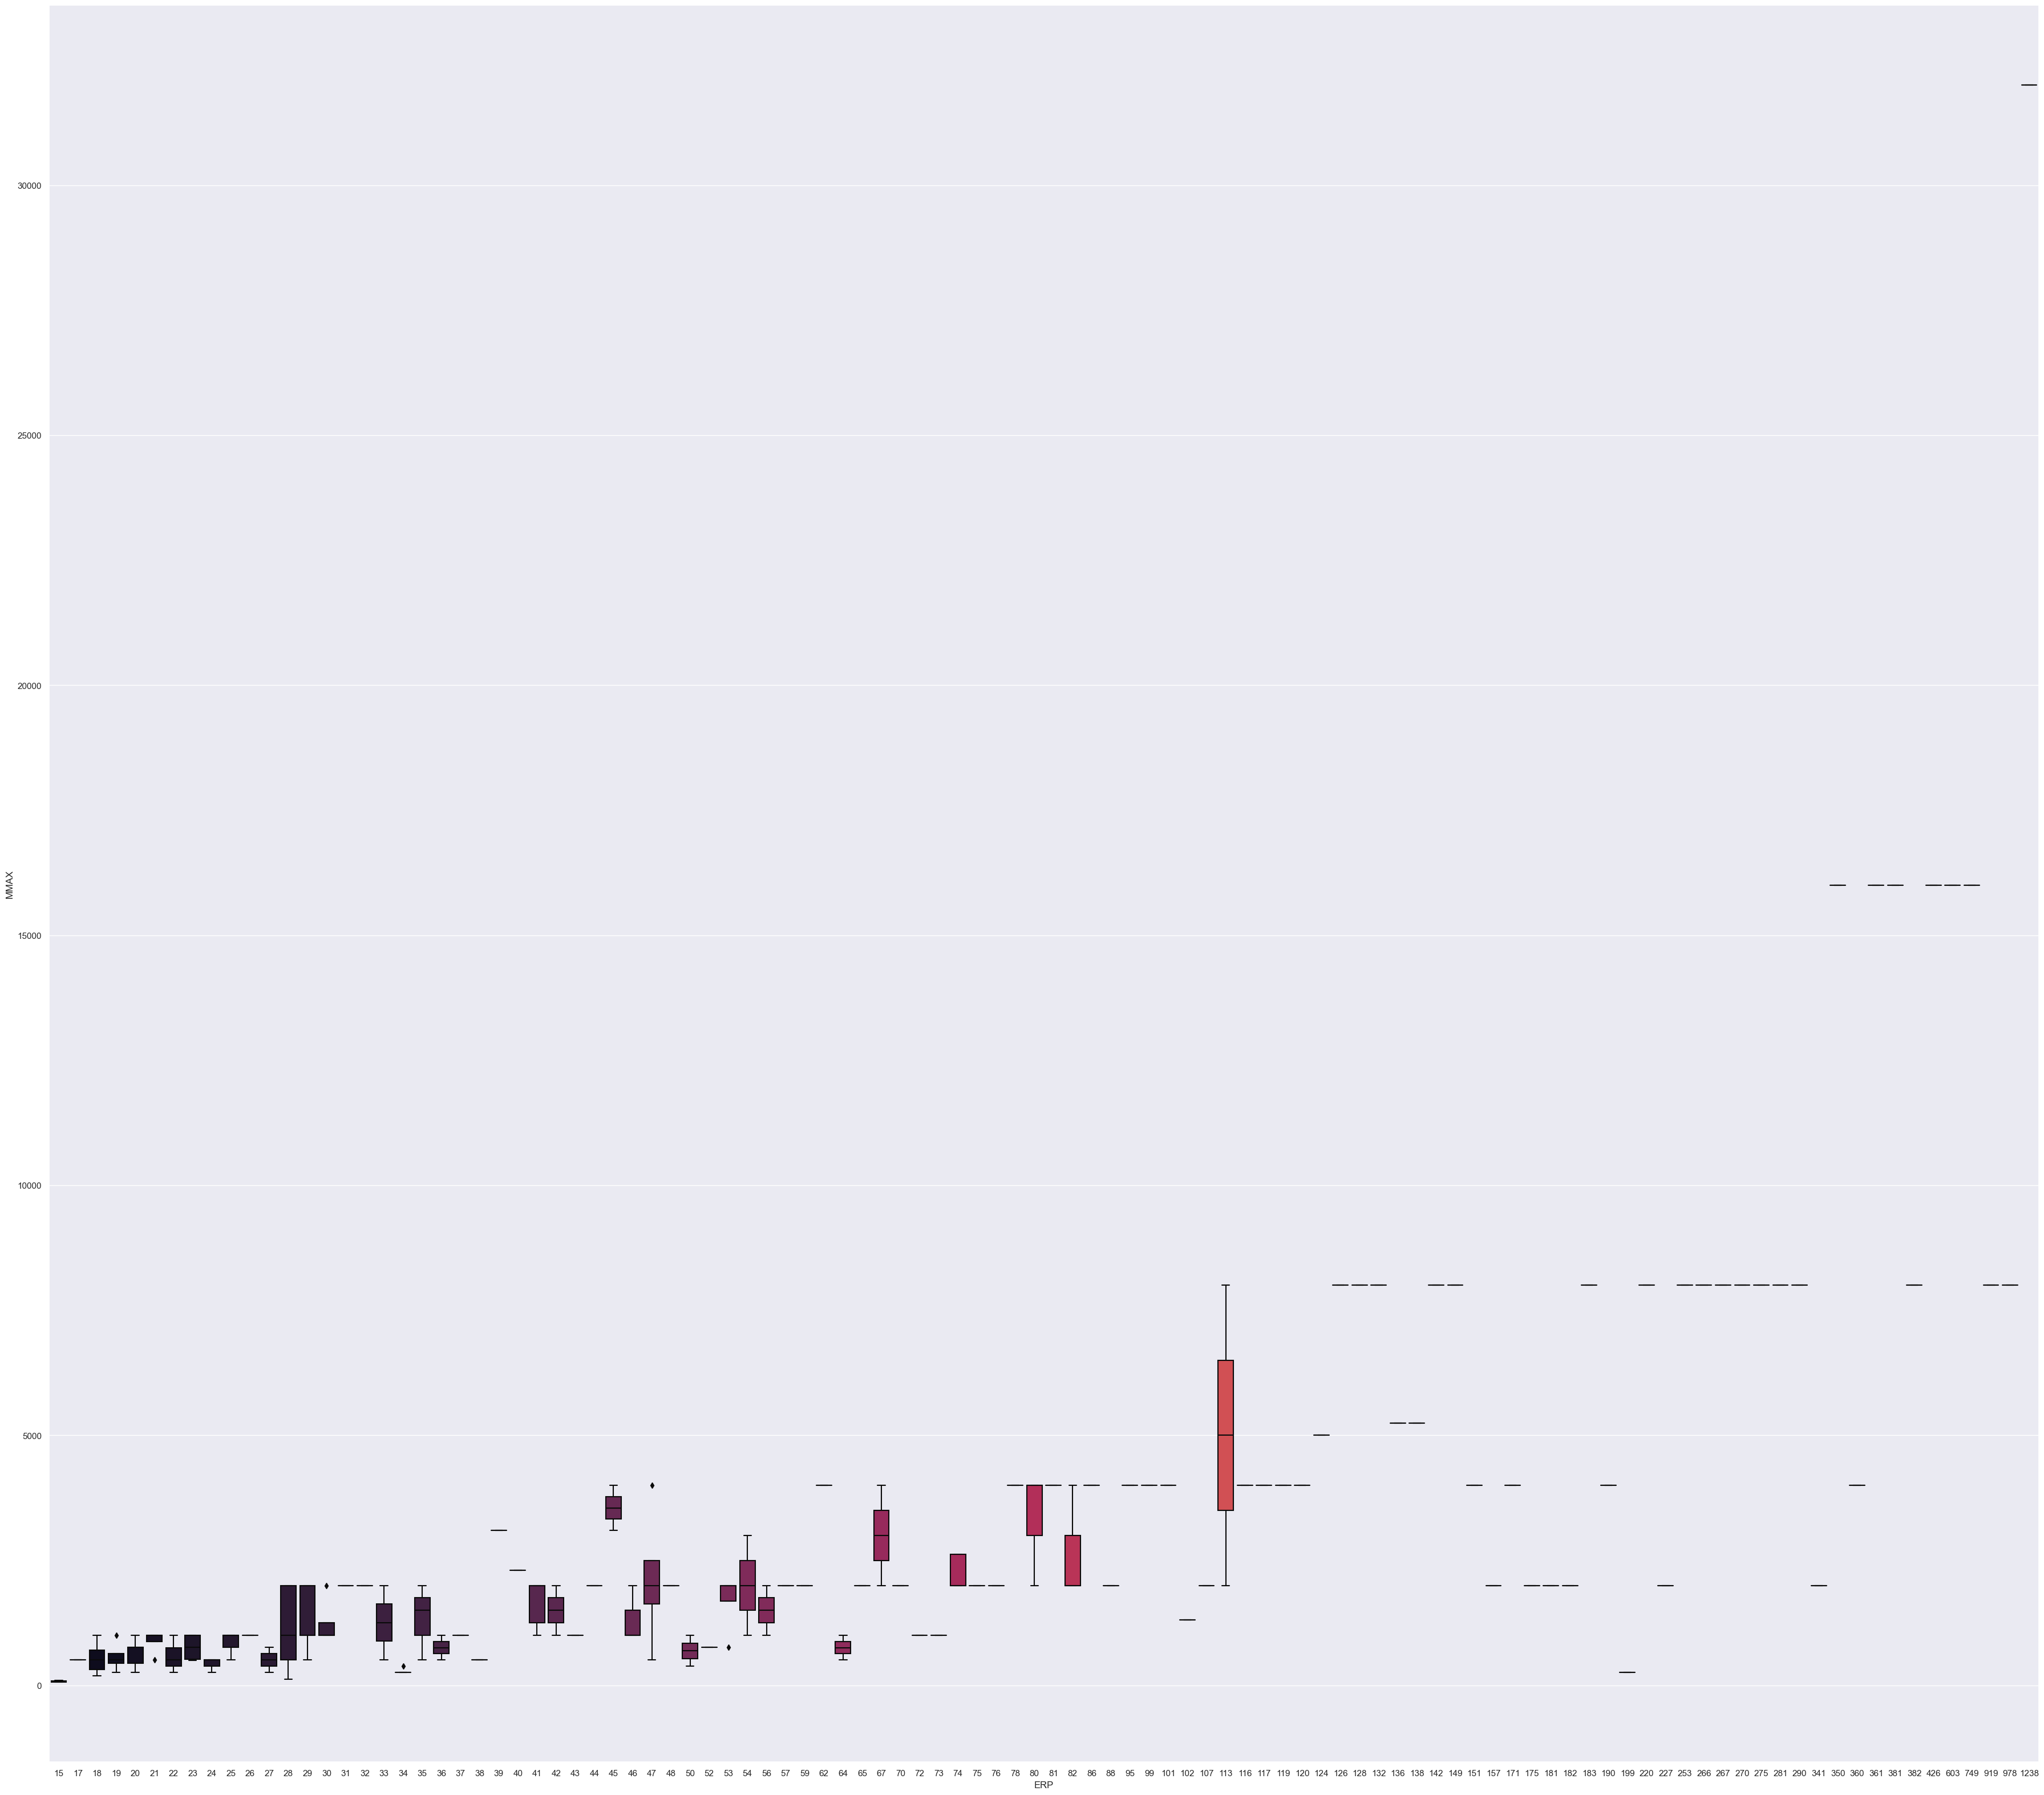

MMIN


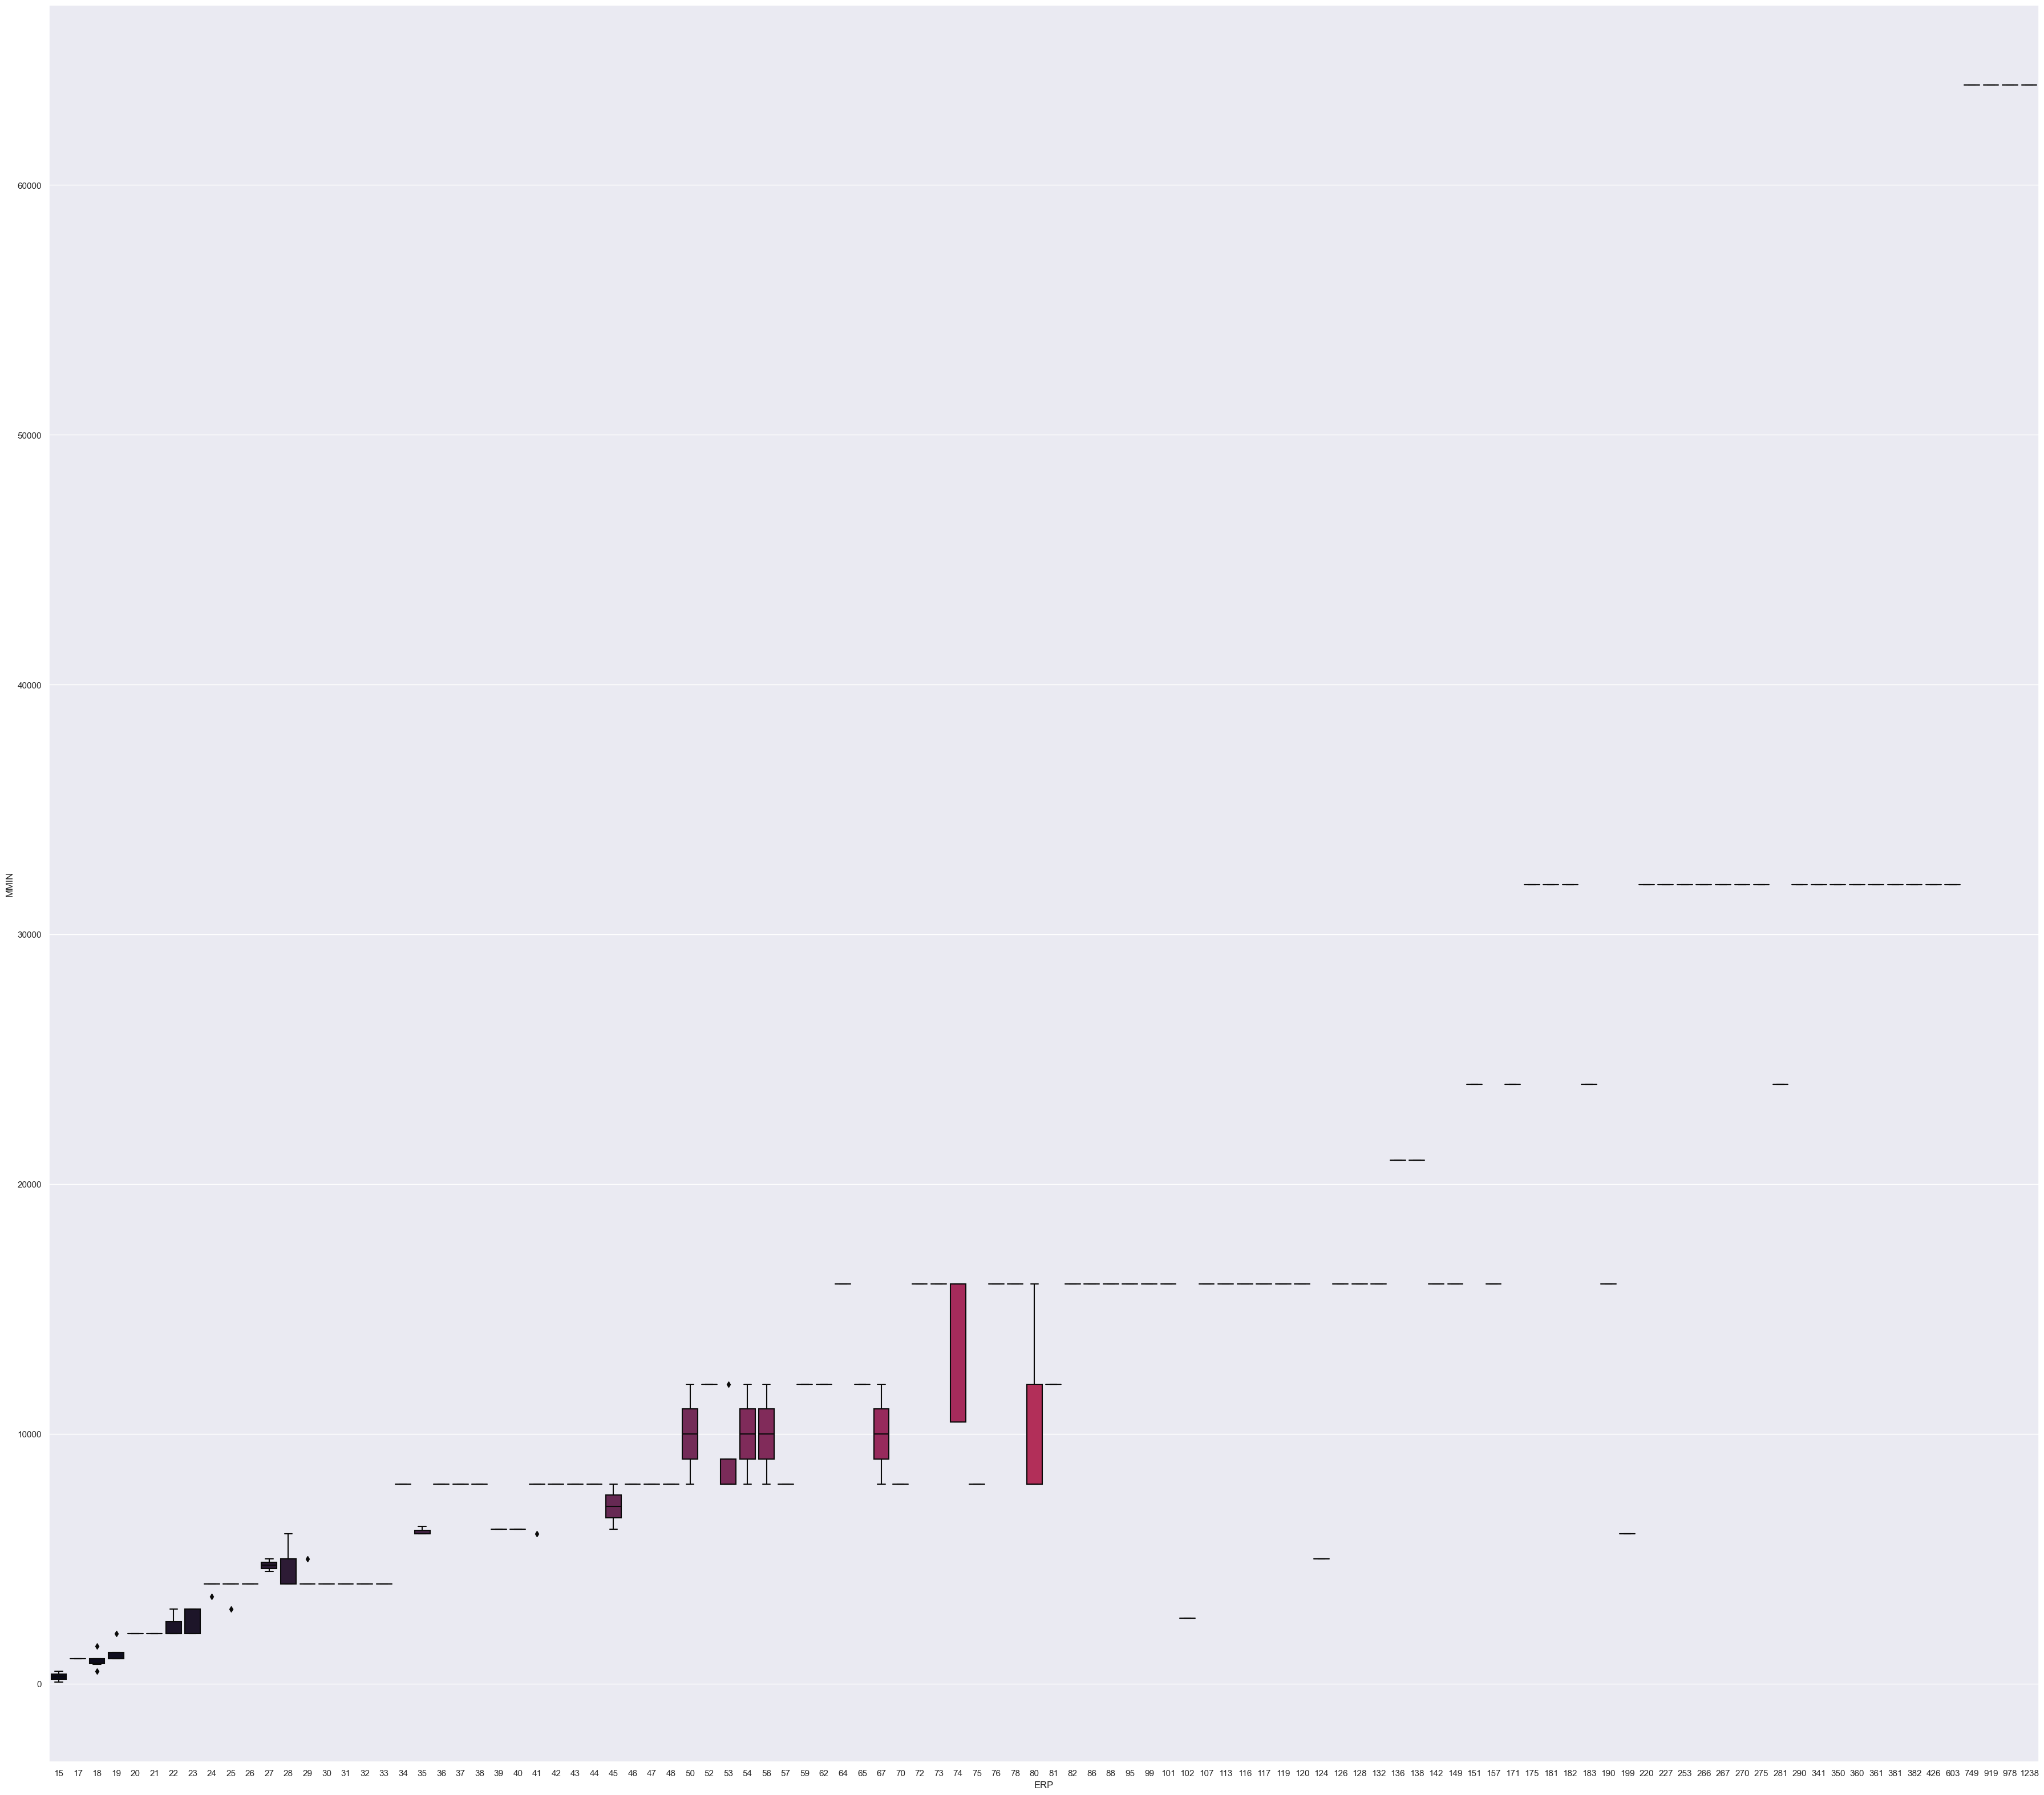

CACH


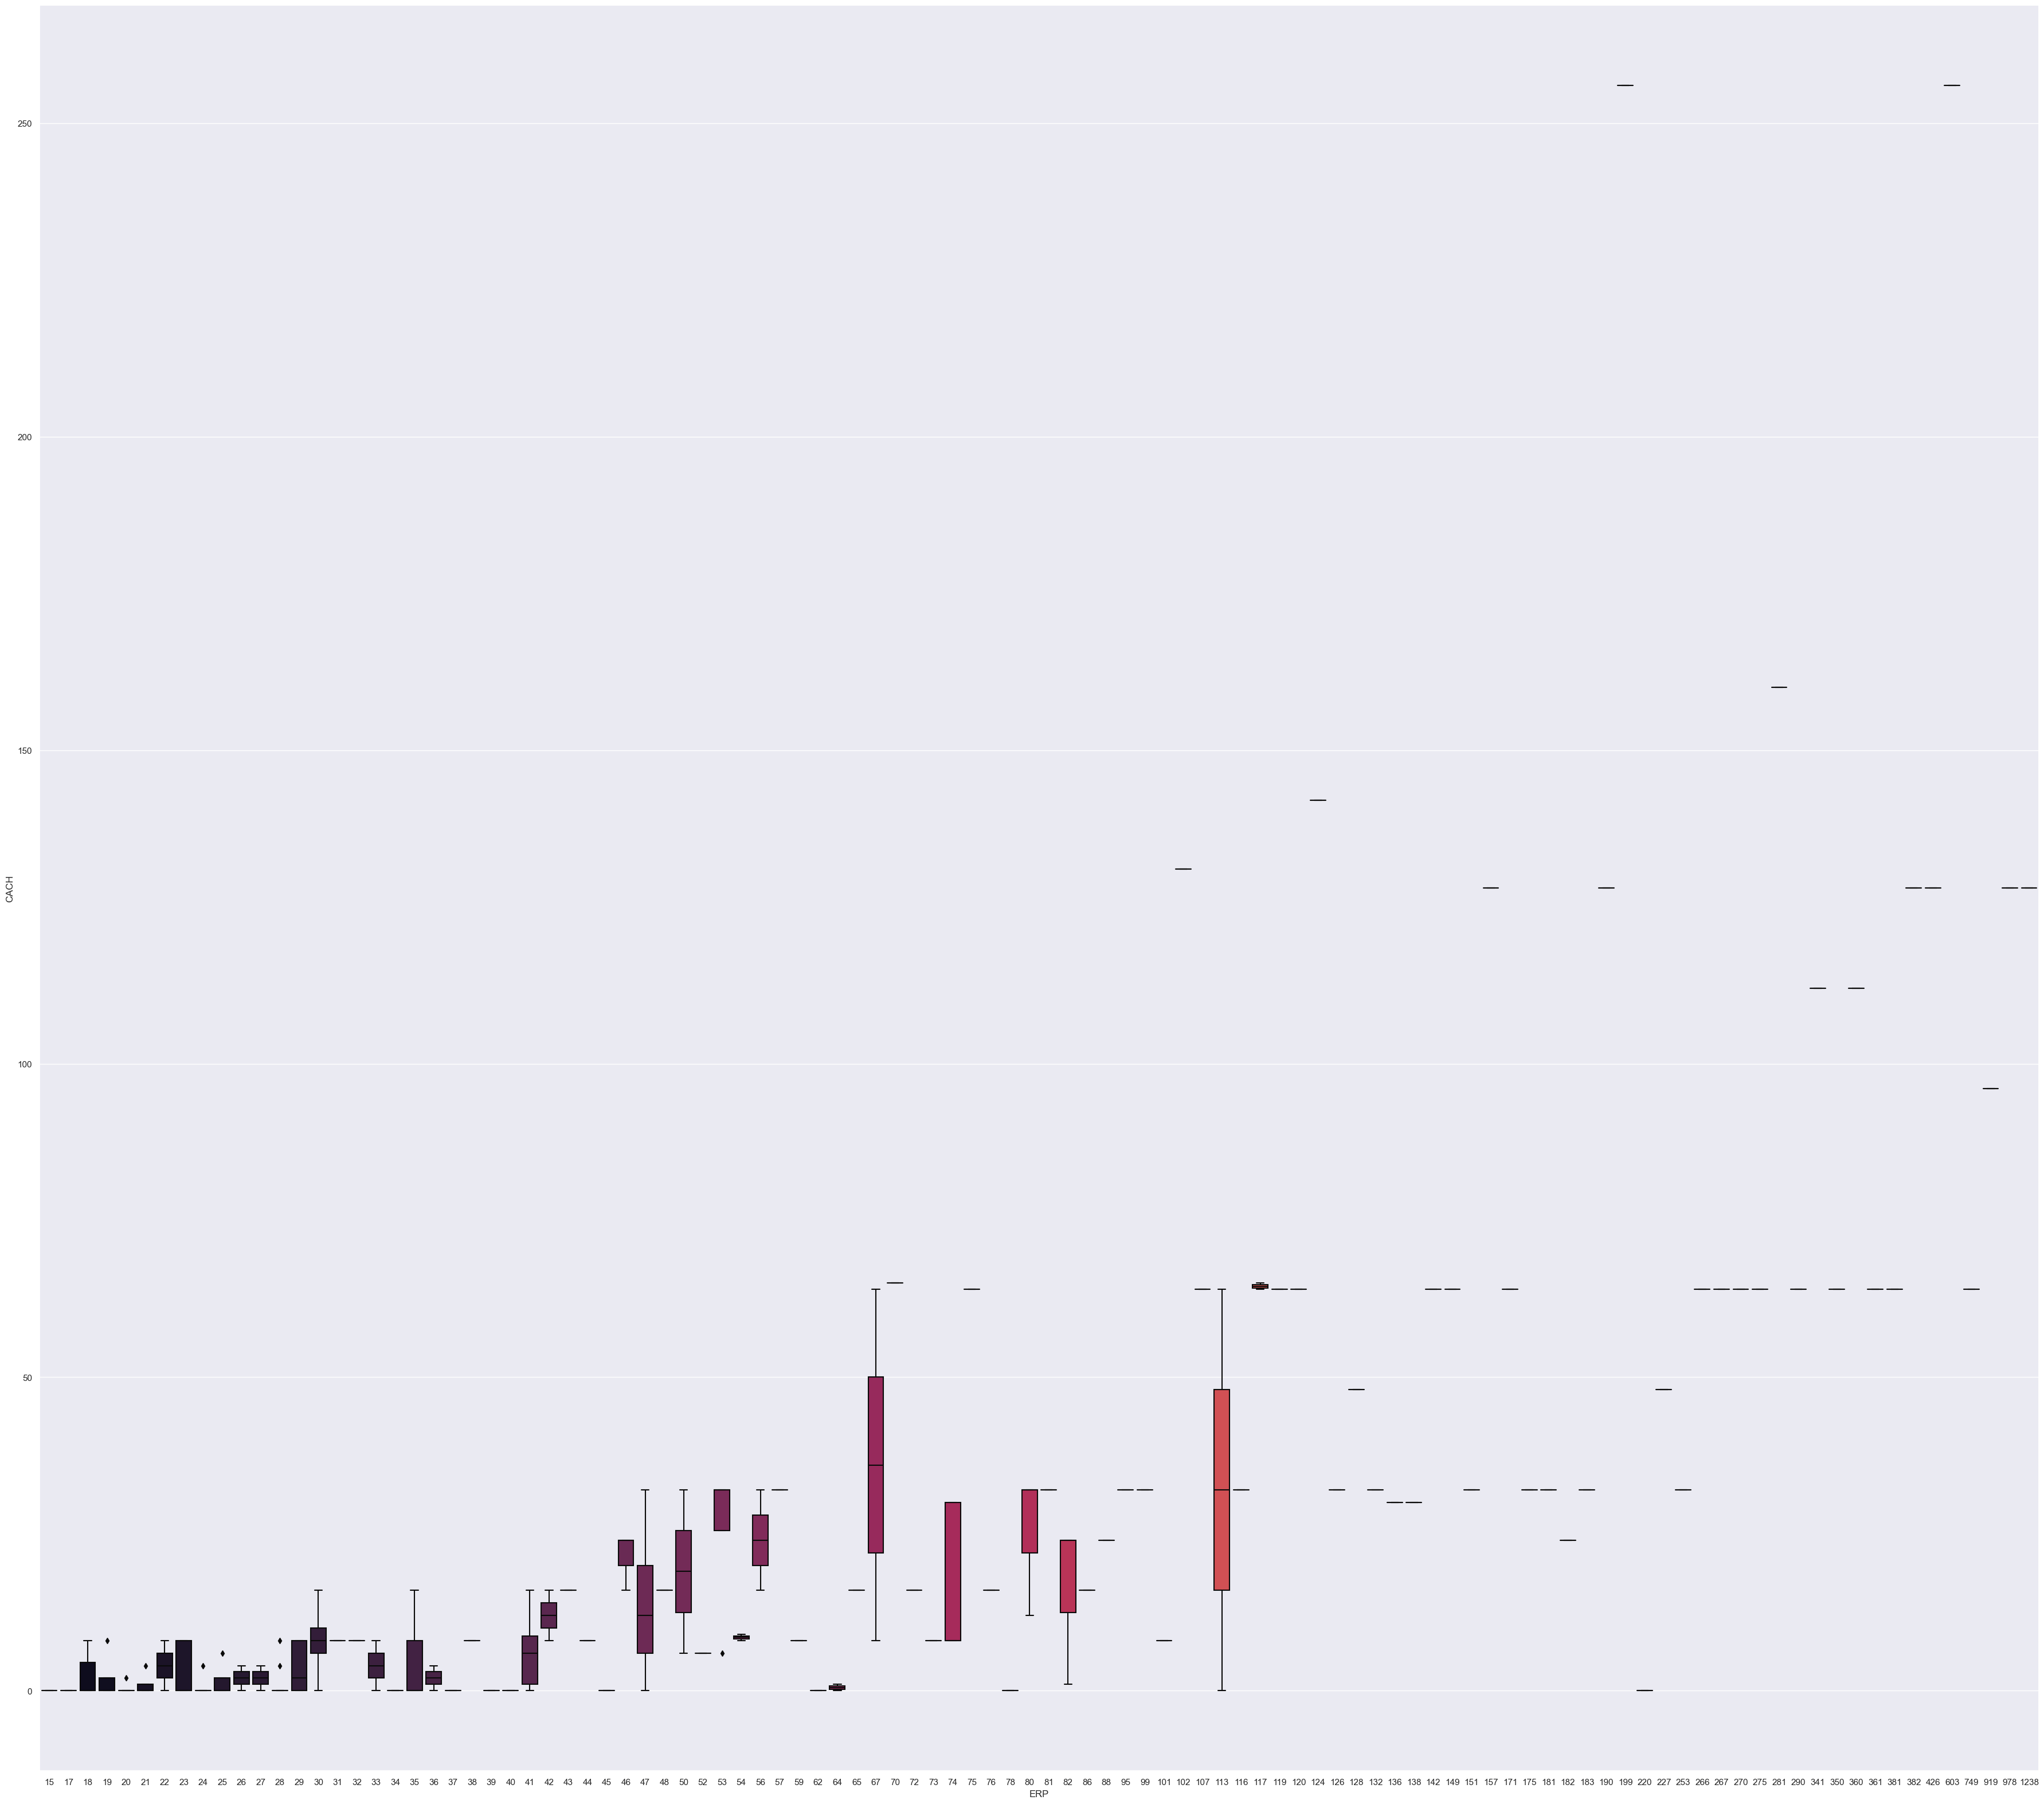

CHMIN


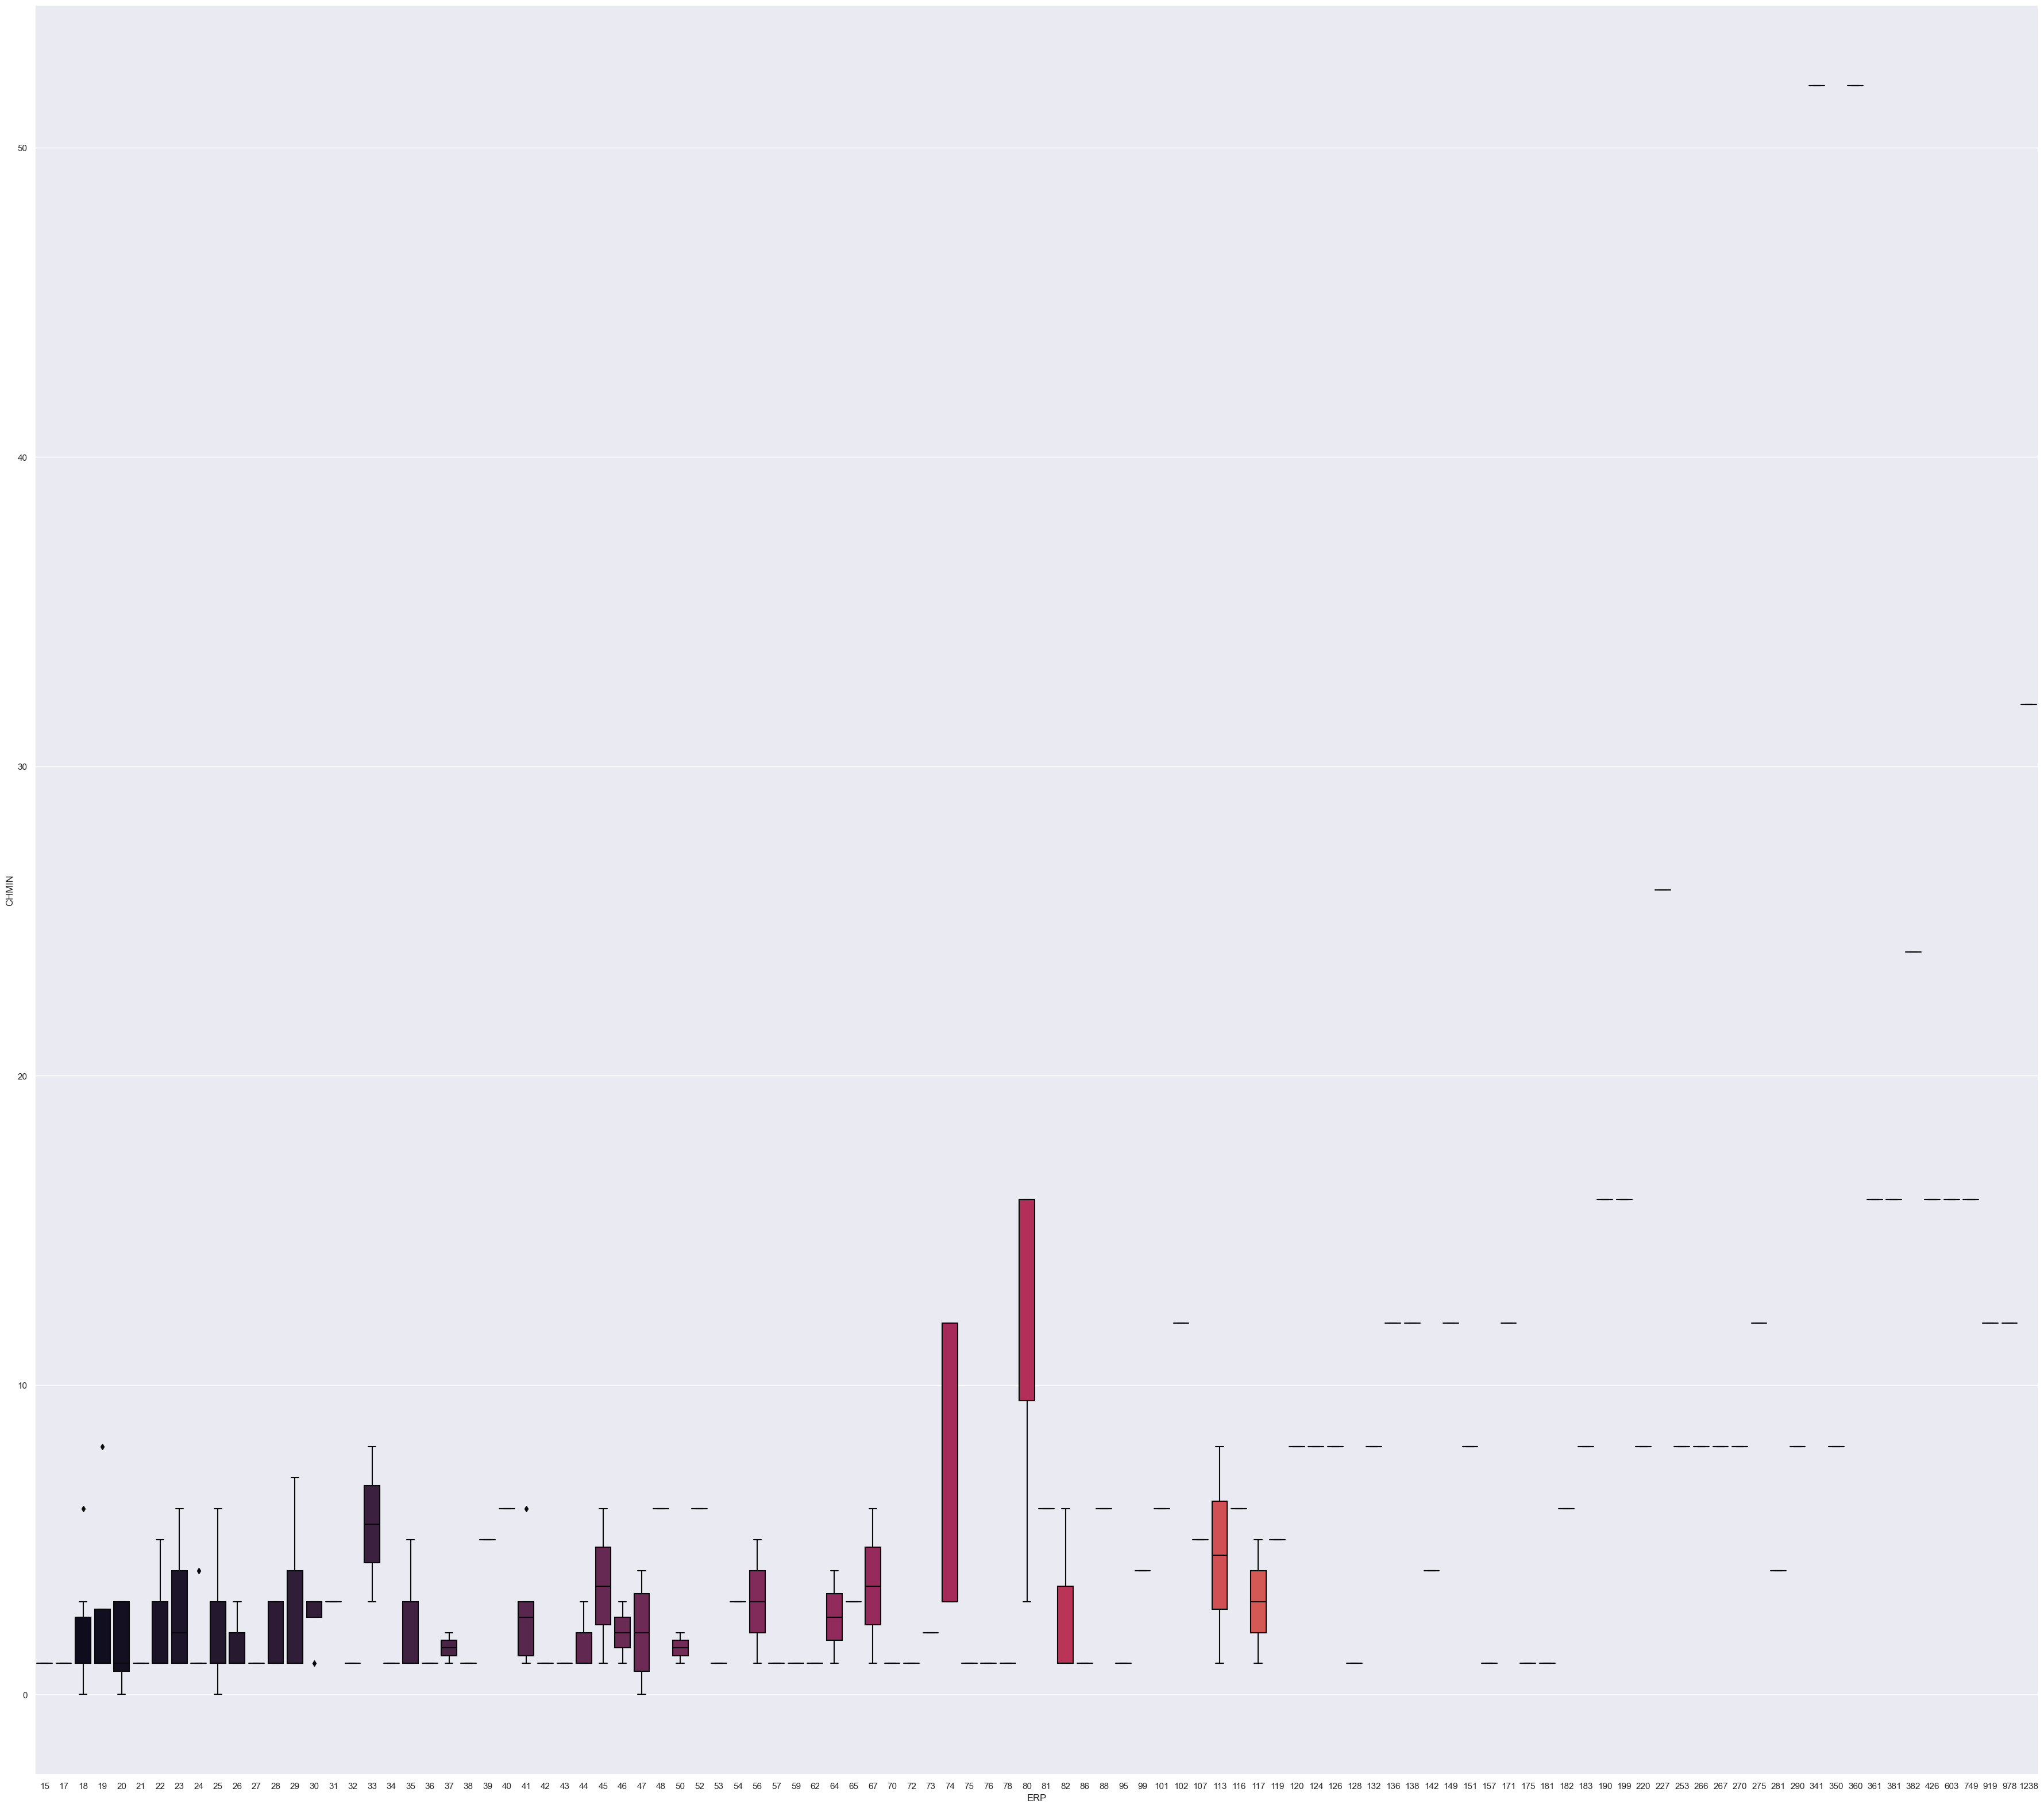

CHMAX


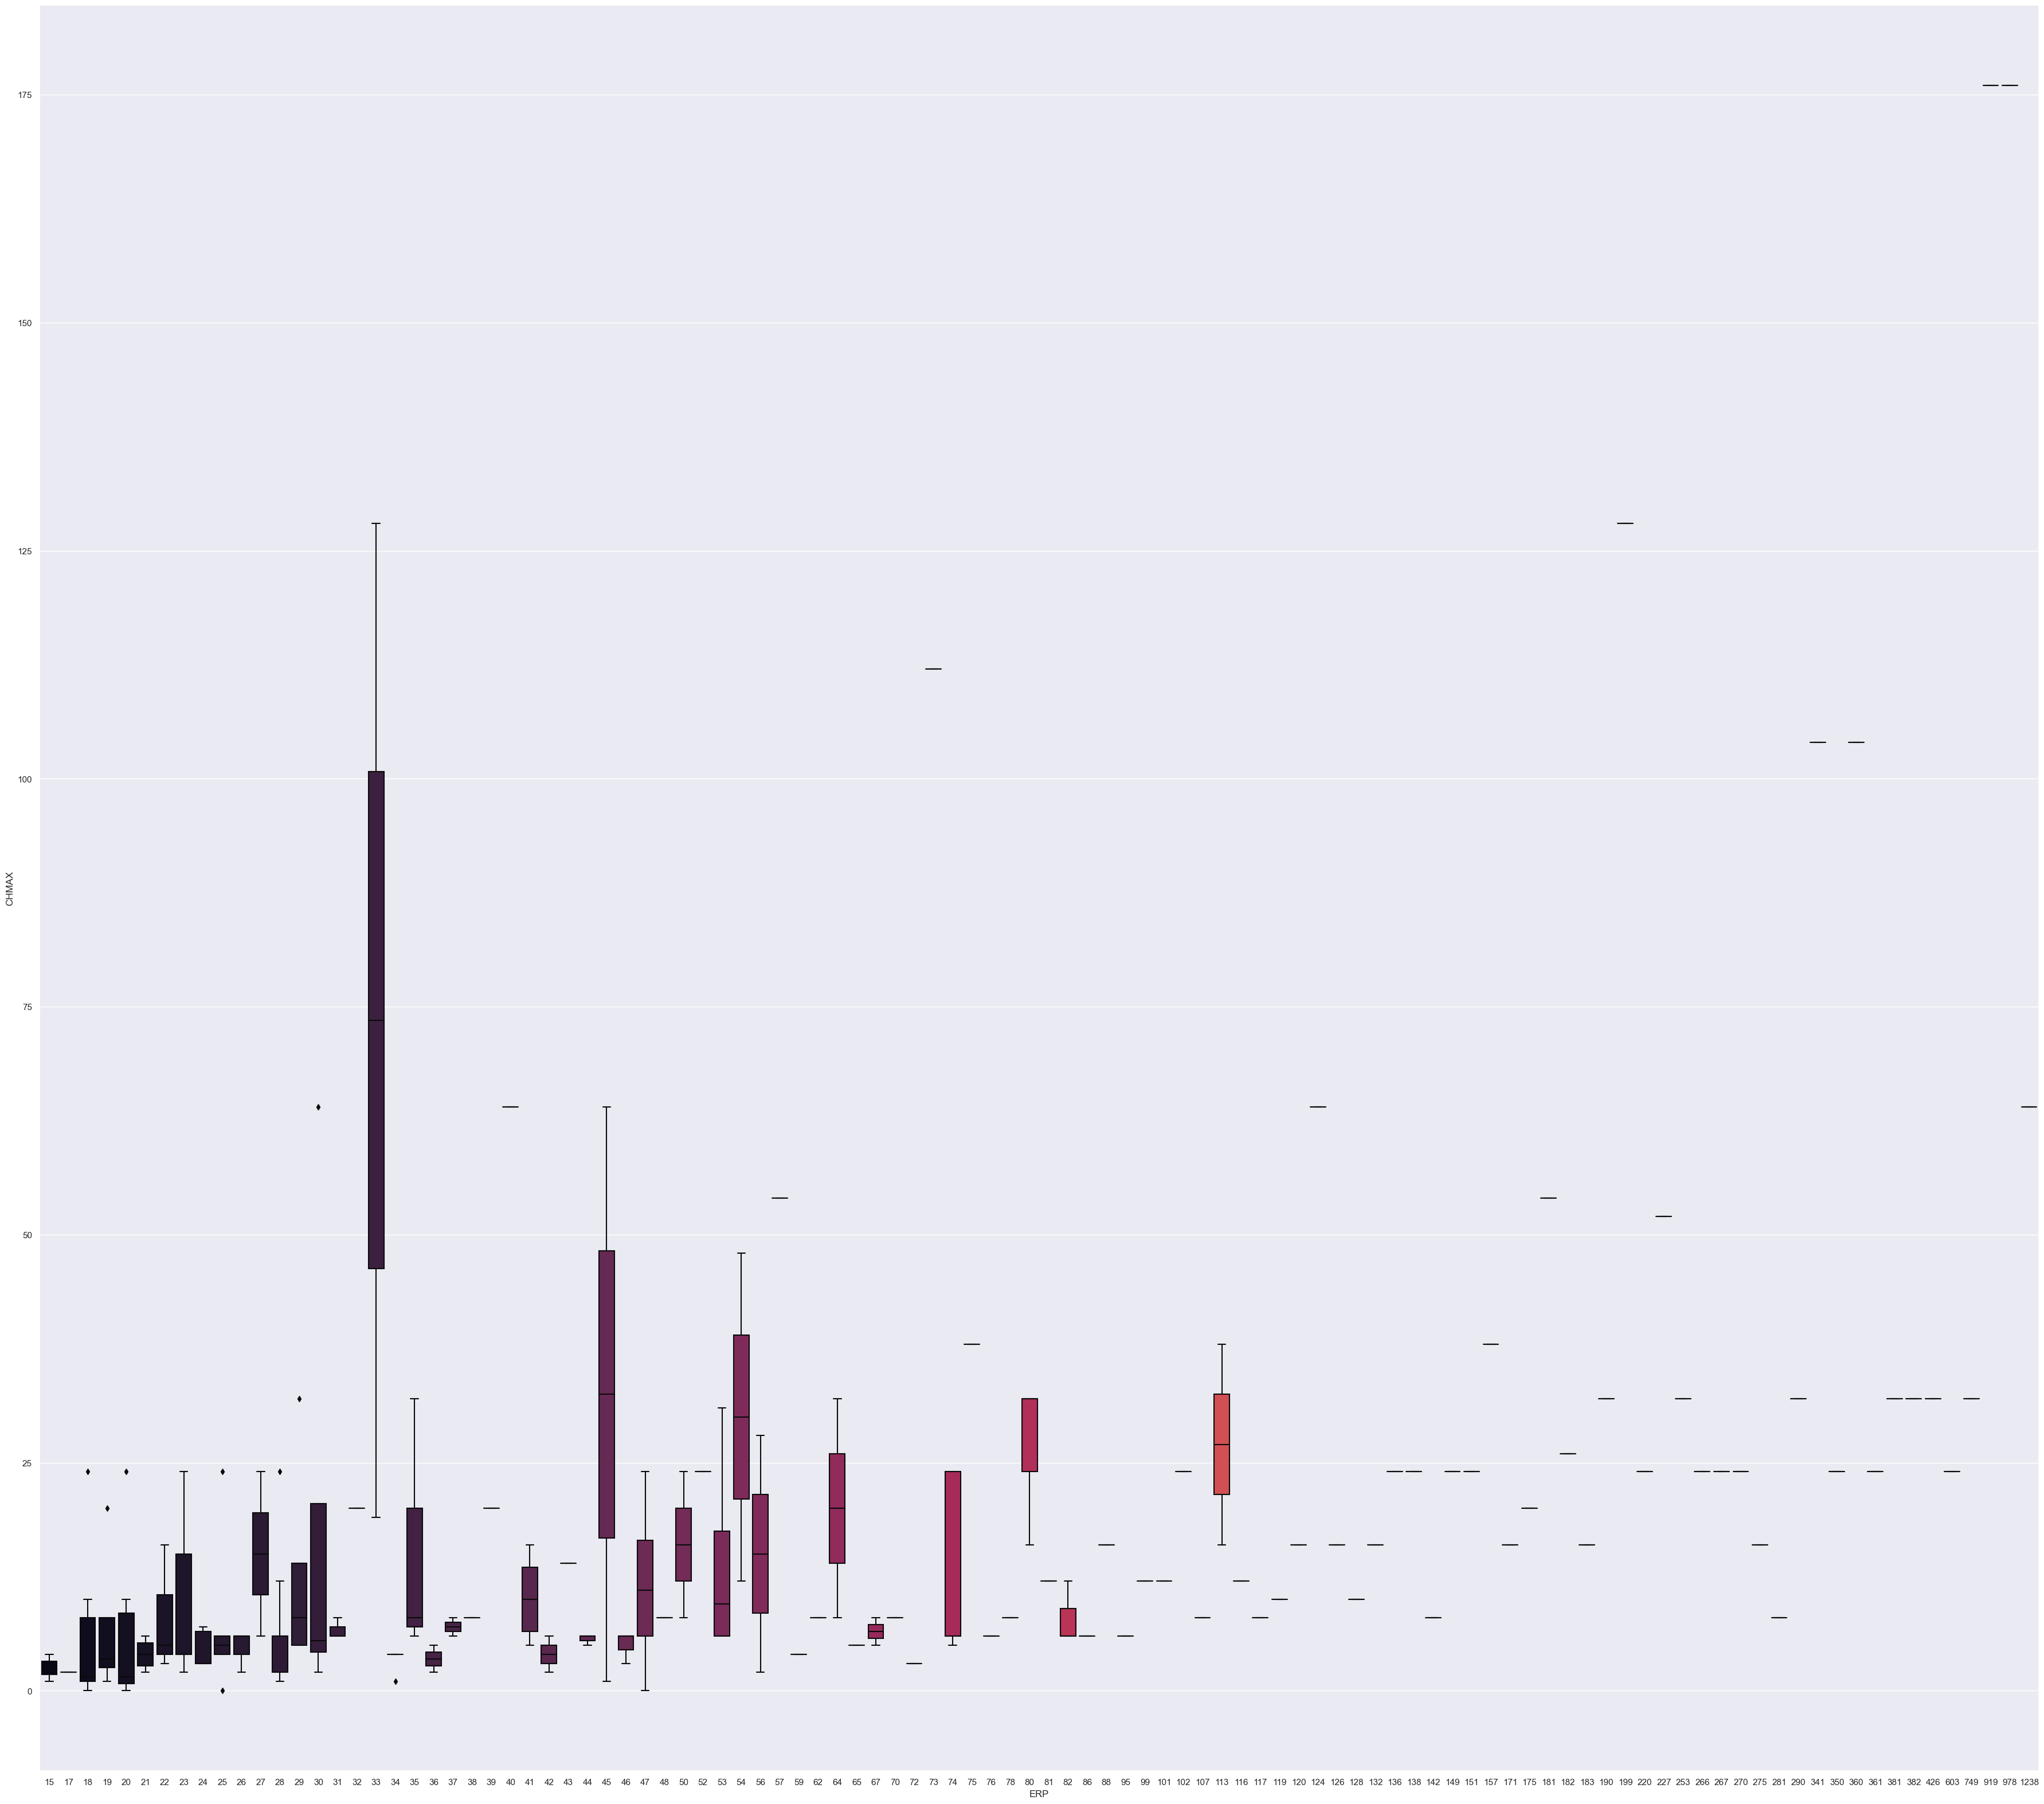

PRP


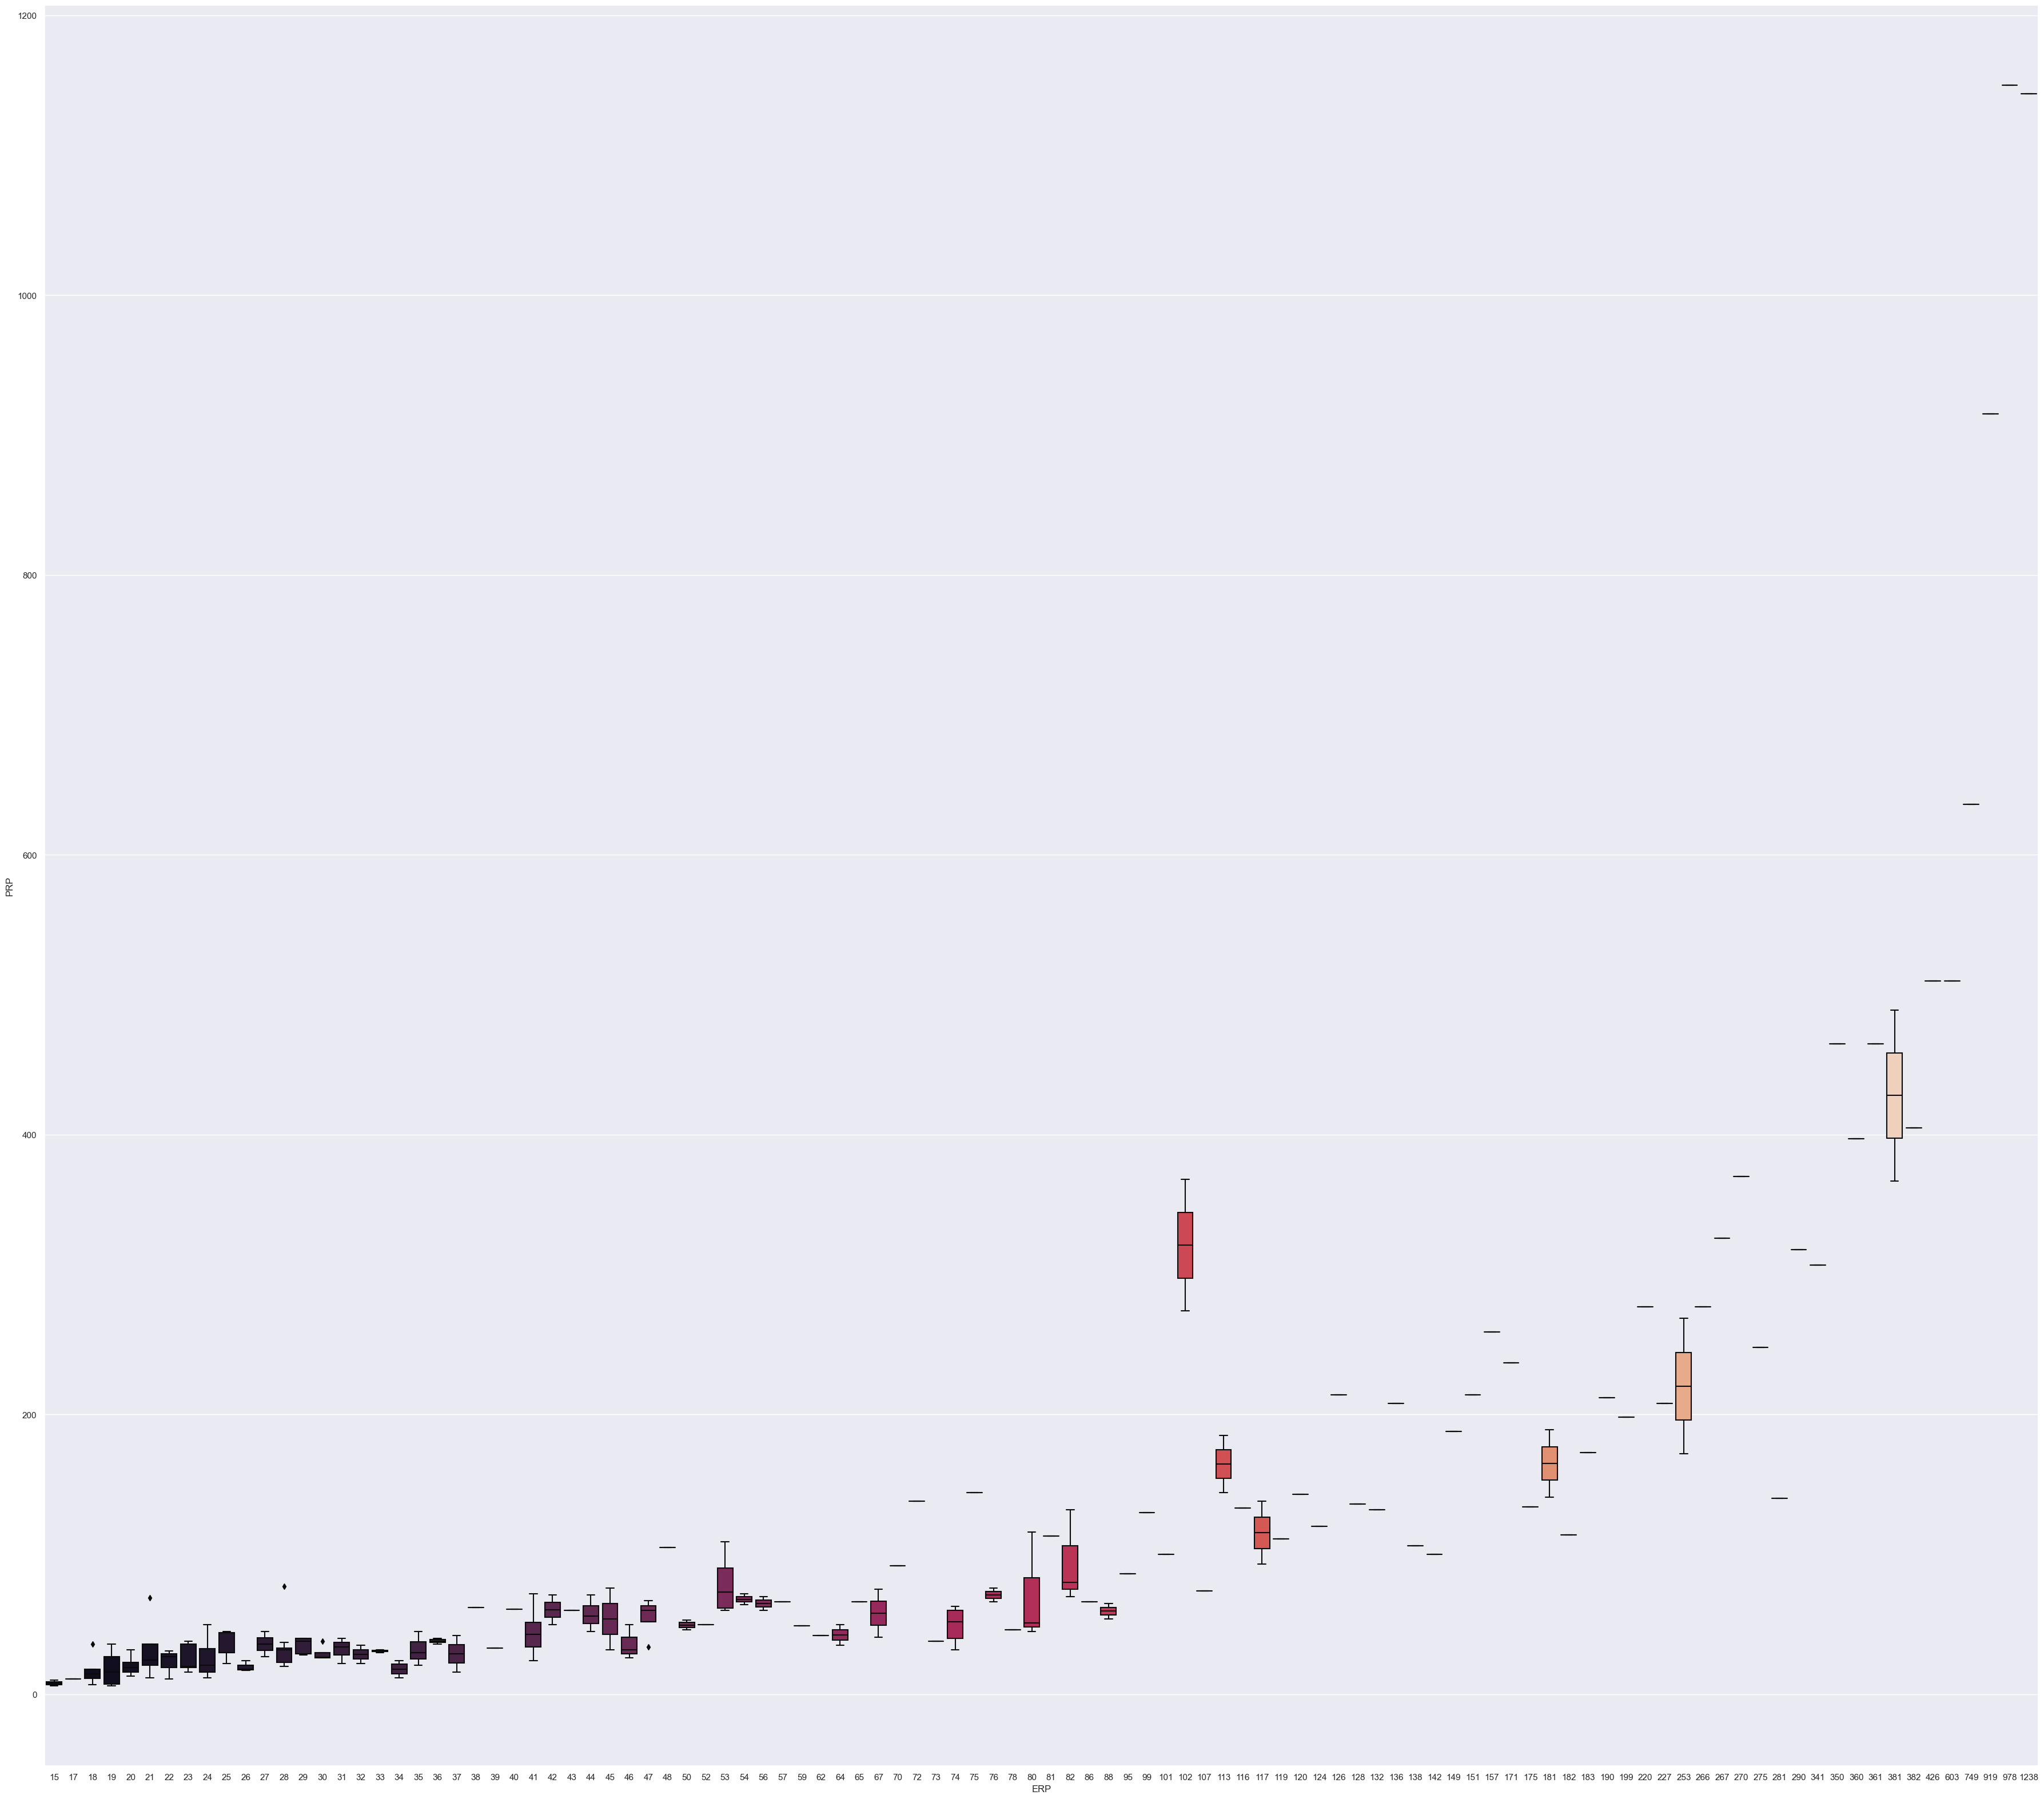

ERP


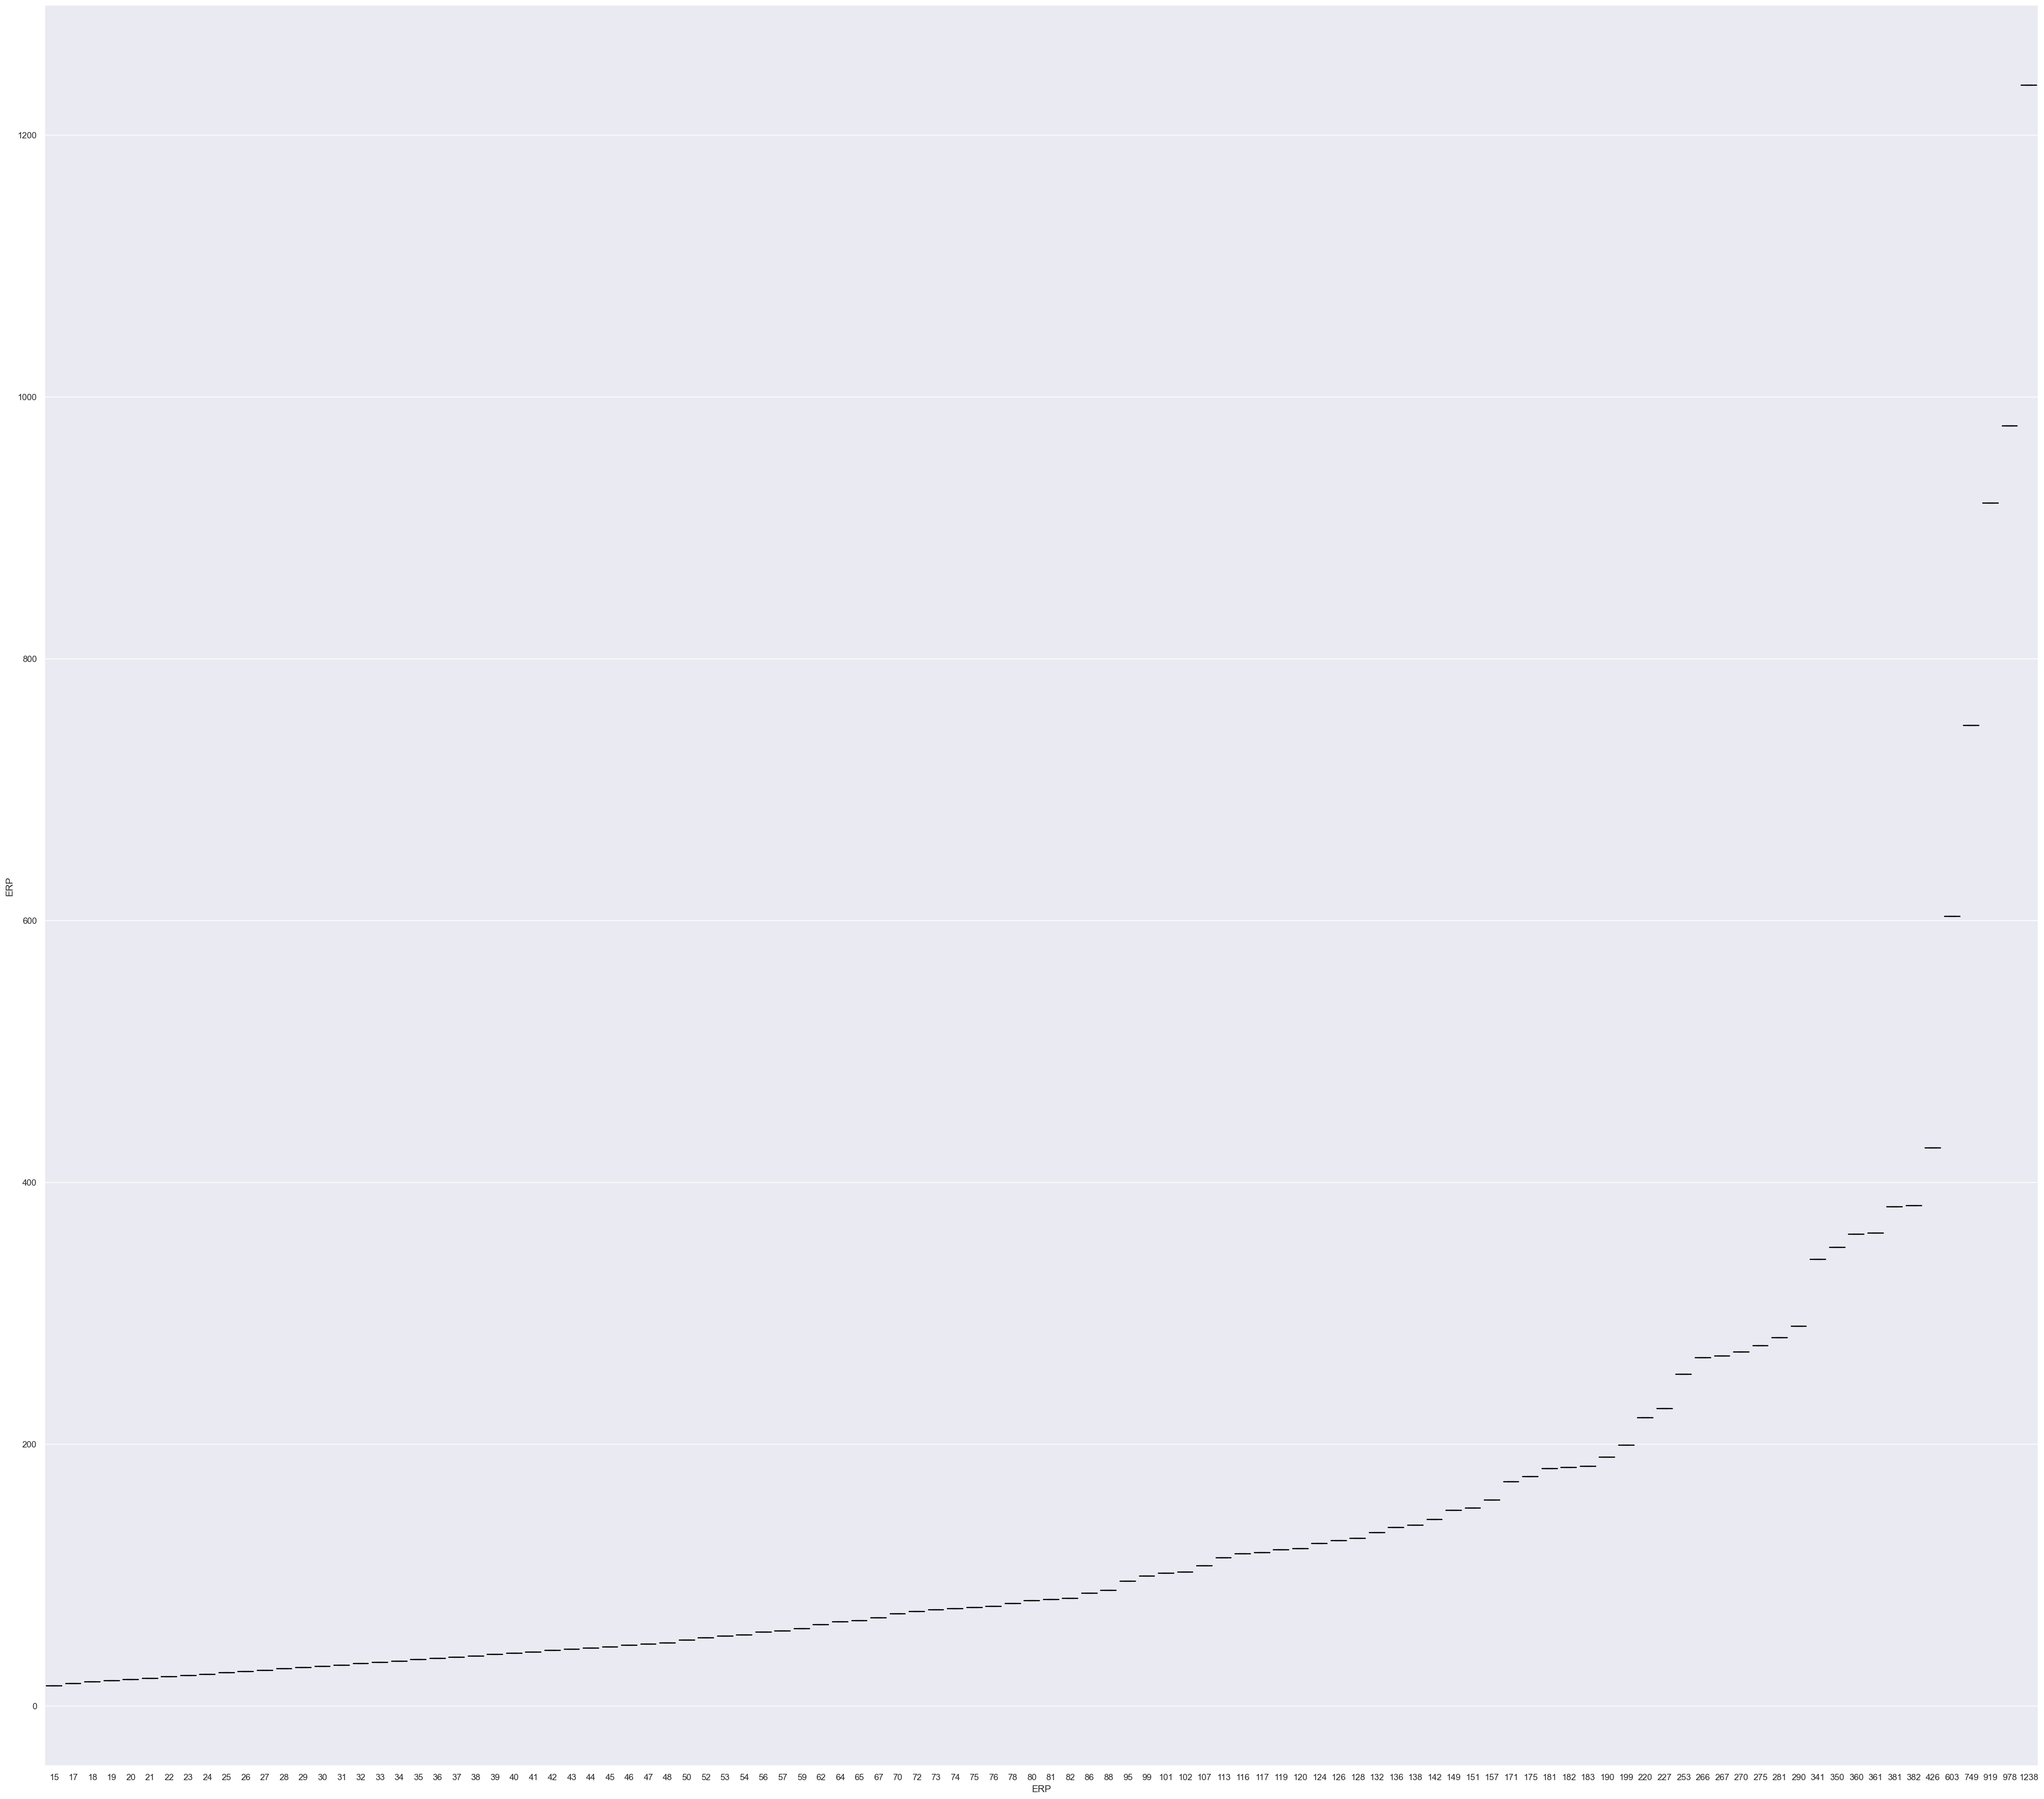

In [18]:
#Print a boxplot comparison of each column, vs Estimated Rate of Performance
for col in df:
    print(col)
    boxplot(col)

# boxplot("Vendor Name")
# boxplot("Model Name")
# boxplot("MYCT")
# boxplot("MMIN")
# boxplot("CACH")
# boxplot("CHMIN")
# # boxplot("CHMAX")  #Does Not like this one "The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()."
# boxplot("PRP")

# Model Selection

# Model Analysis

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd # for data science
import numpy as np  # linear algebra library
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # additional plotting library

data = pd.read_csv('machine.csv', sep=',')

#MLR of PRP
x = data.iloc[:, [2,3,4,5,6,7,9]]
y = pd.DataFrame(data['PRP'])

print(x)
print(y)

     MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  ERP
0     125   256   6000   256     16    128  199
1      29  8000  32000    32      8     32  253
2      29  8000  32000    32      8     32  253
3      29  8000  32000    32      8     32  253
4      29  8000  16000    32      8     16  132
..    ...   ...    ...   ...    ...    ...  ...
204   124  1000   8000     0      1      8   37
205    98  1000   8000    32      2      8   50
206   125  2000   8000     0      2     14   41
207   480   512   8000    32      0      0   47
208   480  1000   4000     0      0      0   25

[209 rows x 7 columns]
     PRP
0    198
1    269
2    220
3    172
4    132
..   ...
204   42
205   46
206   52
207   67
208   45

[209 rows x 1 columns]


In [20]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#OLS multiple linear regression
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PRP   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     339.5
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.15e-83
Time:                        21:36:41   Log-Likelihood:                -715.12
No. Observations:                 146   AIC:                             1446.
Df Residuals:                     138   BIC:                             1470.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7485      6.853     -0.839      0.403     -19.299       7.802
MYCT           0.0008      0.012      0.065      0.949      -0.024       0.025
MMIN           0.0095      0.002      5.327      0.000       0.006       0.013
MMAX           0.0010      0.001      1.810      0.072   -9.63e-05       0.002
CACH           0.0107      0.106      0.101      0.920      -0.198       0.220
CHMIN          1.4320      0.689      2.079      0.039       0.070       2.794
CHMAX          0.0768      0.166      0.461      0.645      -0.252       0.406
ERP            0.5949      0.076      7.846      0.000       0.445       0.745
==============================================================================
Omnibus:                       15.623   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.536
Skew:                           0.017   Prob(JB):                     5.29e-13
Kurtosis:                       6.048   Cond. No.                     4.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
import seaborn as sns
sns.set_theme()

data = pd.read_csv('machine.csv', sep=',')

data = data.iloc[:, [2,3,4,5,6,7,8,9]]
data.head(10)

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
5,26,8000,32000,64,8,32,318,290
6,23,16000,32000,64,16,32,367,381
7,23,16000,32000,64,16,32,489,381
8,23,16000,64000,64,16,32,636,749
9,23,32000,64000,128,32,64,1144,1238


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

class Linear():
    def __init__(self, x, xlabel, y):
        #Training model
        ols = linear_model.LinearRegression()
        model = ols.fit(x, y)
        response = model.predict(x)

        #Evaluate model
        r2 = model.score(x, y)

        #Plot graphs
        plt.style.use('default')
        plt.style.use('ggplot')

        fig, ax = plt.subplots(figsize=(8, 4))

        ax.plot(x, response, color='k', label='Regression model')
        ax.scatter(x, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
        ax.set_ylabel('PRP', fontsize=14)
        ax.set_xlabel(xlabel, fontsize=14)
        ax.text(0.8, 0.1, 'model', fontsize=13, ha='center', va='center',
                 transform=ax.transAxes, color='grey', alpha=0.5)
        ax.legend(facecolor='white', fontsize=11)
        ax.set_title(xlabel % r2, fontsize=18)

        fig.tight_layout()

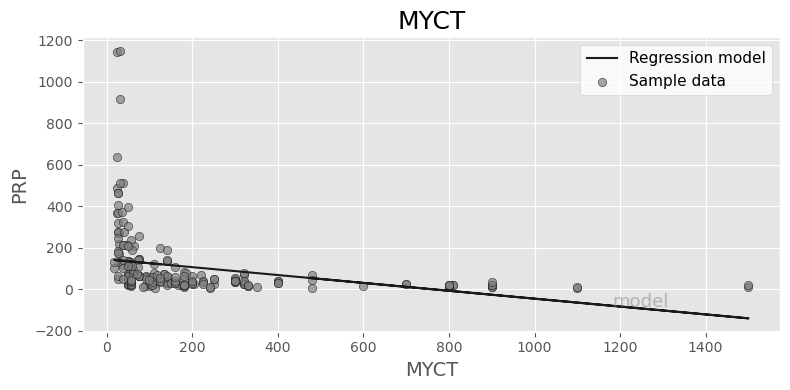

In [65]:
data = pd.read_csv('machine.csv', sep=',')

x = data.iloc[:, [2]].values.reshape(-1,1)
xlabel = 'MYCT'
y = data['PRP'].values

graph = Linear(x, xlabel, y)

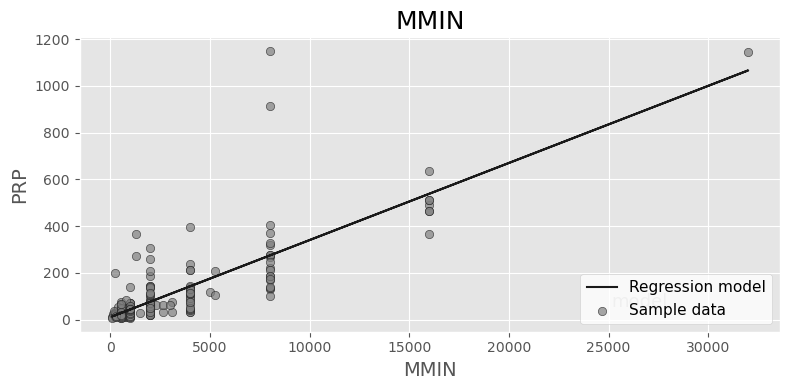

In [64]:
data = pd.read_csv('machine.csv', sep=',')

x = data.iloc[:, [3]].values.reshape(-1,1)
xlabel = 'MMIN'
y = data['PRP'].values

graph = Linear(x, xlabel, y)

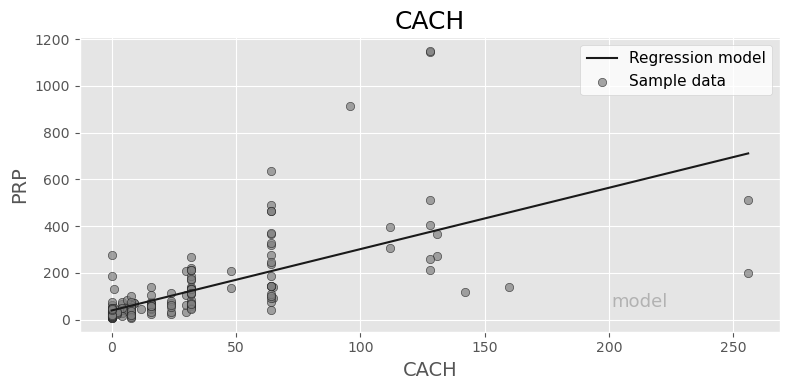

In [63]:
data = pd.read_csv('machine.csv', sep=',')

x = data.iloc[:, [5]].values.reshape(-1,1)
xlabel = 'CACH'
y = data['PRP'].values

graph = Linear(x, xlabel, y)

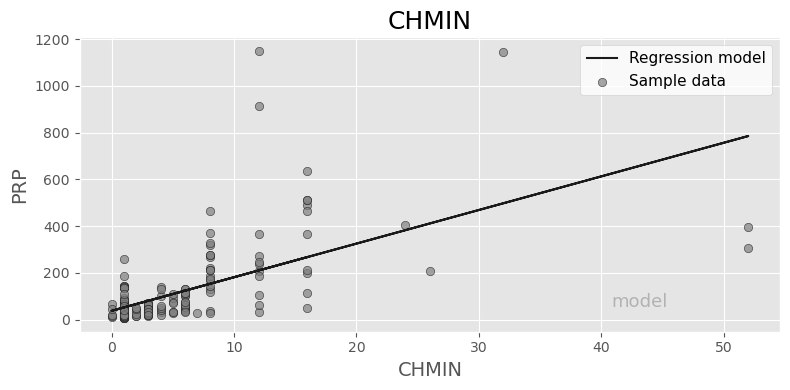

In [62]:
data = pd.read_csv('machine.csv', sep=',')

x = data.iloc[:, [6]].values.reshape(-1,1)
xlabel = 'CHMIN'
y = data['PRP'].values

graph = Linear(x, xlabel, y)

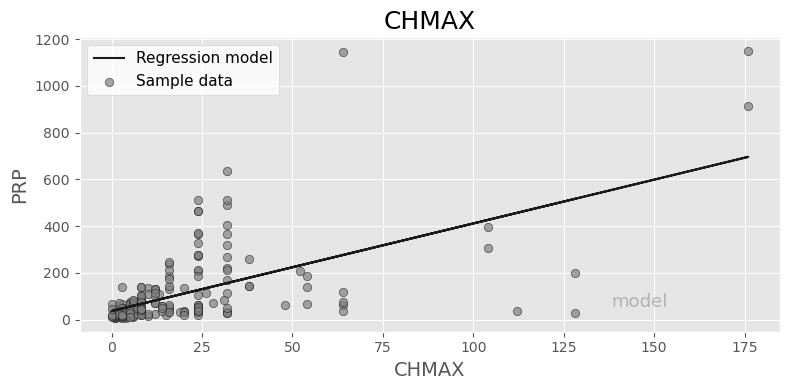

In [61]:
data = pd.read_csv('machine.csv', sep=',')

x = data.iloc[:, [7]].values.reshape(-1,1)
xlabel = 'CHMAX'
y = data['PRP'].values

graph = Linear(x, xlabel, y)

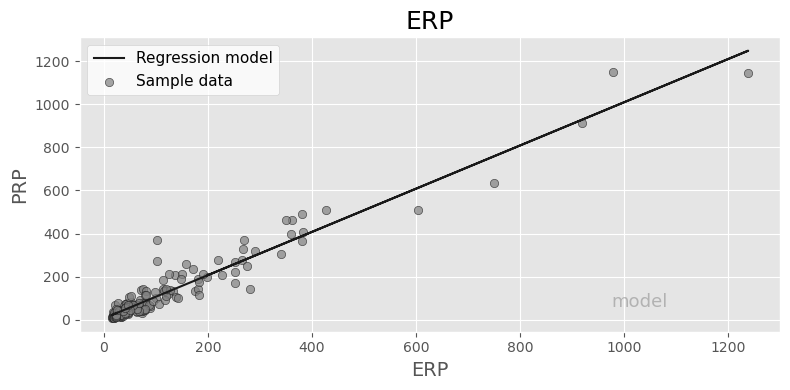

In [60]:
data = pd.read_csv('machine.csv', sep=',')

x = data.iloc[:, [9]].values.reshape(-1,1)
xlabel = 'ERP'
y = data['PRP'].values

graph = Linear(x, xlabel, y)

In [ ]:
data = pd.read_csv('machine.csv', sep=',')
print(data.iloc[:, [4]])

x = data.iloc[:, [4]].values.reshape(-1,1)
xlabel = 'MMAX'
y = data['PRP'].values

graph = Linear(x, xlabel, y)

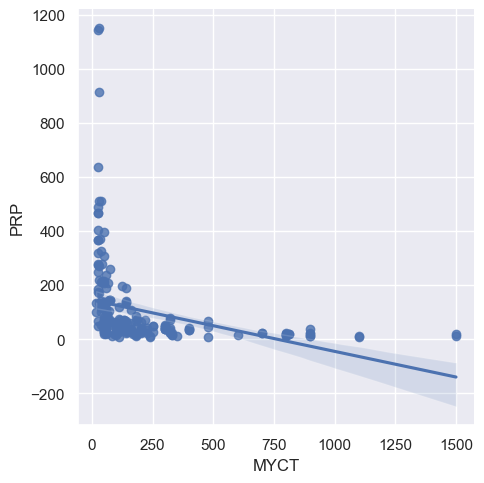

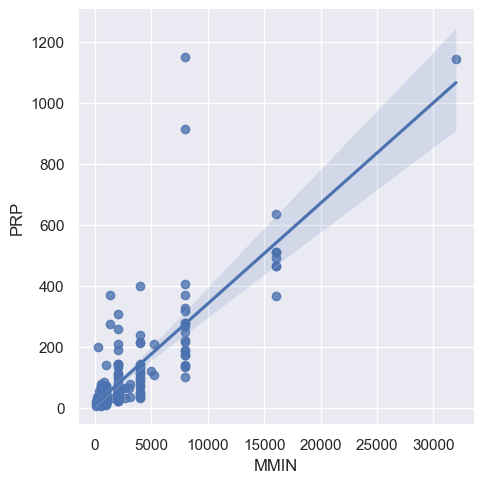

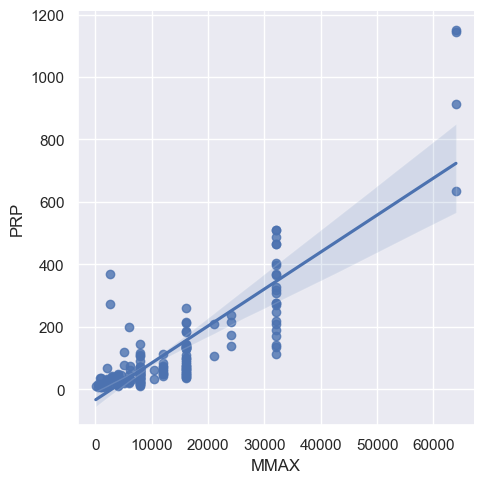

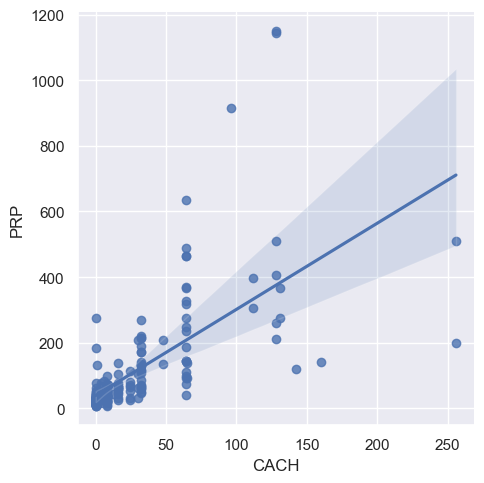

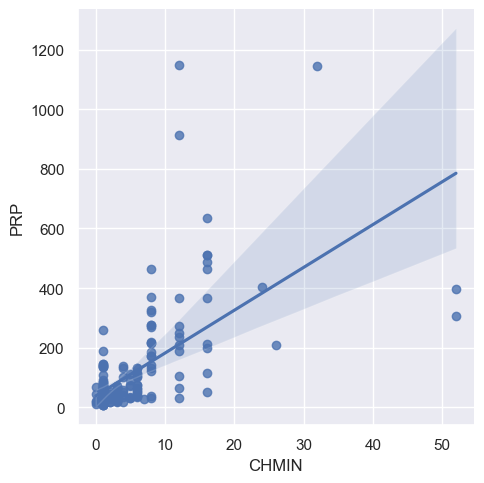

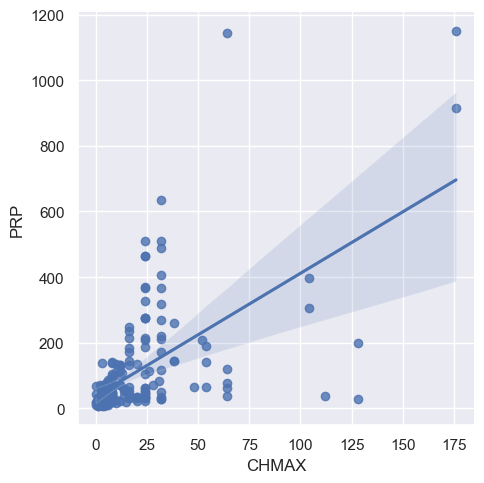

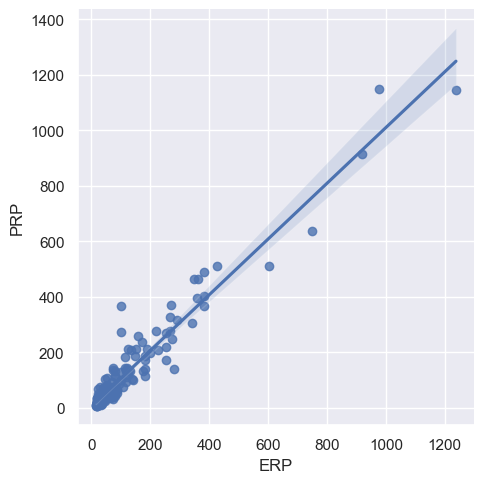

In [26]:
from sklearn.linear_model import LinearRegression

data = pd.read_csv('machine.csv', sep=',')

data = data.iloc[:, [2,3,4,5,6,7,8,9]]


#Plot MLR graphs
for col in data:
    if(col != "PRP"):
        sns.lmplot(
        data=data,
        x=col, y="PRP",
        height=5
        )
        
        #Broken
#         X_train, X_test, y_train, y_test = train_test_split(data, data.iloc[:, [8]], test_size=0.2, random_state=0)
#         regressor = LinearRegression()
#         regressor.fit(X_train, y_train)

#         y_pred = regressor.predict(X_test)
        
#         plt.scatter(X_train, y_train,color='g')
#         plt.plot(X_test, y_pred,color='k')

#         plt.show()

# Conclusion and Recommendations

# Refences

https://dl.acm.org/doi/10.1145/32232.32234

https://archive.ics.uci.edu/dataset/29/computer+hardware


## Machine.Name Files (Via the UCI Repository)


1. Title: Relative CPU Performance Data 

2. Source Information
   -- Creators: Phillip Ein-Dor and Jacob Feldmesser
     -- Ein-Dor: Faculty of Management; Tel Aviv University; Ramat-Aviv; 
        Tel Aviv, 69978; Israel
   -- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   -- Date: October, 1987
 
3. Past Usage:
    1. Ein-Dor and Feldmesser (CACM 4/87, pp 308-317)
       -- Results: 
          -- linear regression prediction of relative cpu performance
          -- Recorded 34% average deviation from actual values 
    2. Kibler,D. & Aha,D. (1988).  Instance-Based Prediction of
       Real-Valued Attributes.  In Proceedings of the CSCSI (Canadian
       AI) Conference.
       -- Results:
          -- instance-based prediction of relative cpu performance
          -- similar results; no transformations required
    - Predicted attribute: cpu relative performance (numeric)

4. Relevant Information:
   -- The estimated relative performance values were estimated by the authors
      using a linear regression method.  See their article (pp 308-313) for
      more details on how the relative performance values were set.

5. Number of Instances: 209 

6. Number of Attributes: 10 (6 predictive attributes, 2 non-predictive, 
                             1 goal field, and the linear regression's guess)

7. Attribute Information:
   1. vendor name: 30 
      (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, 
       dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, 
       microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, 
       sratus, wang)
   2. Model Name: many unique symbols
   3. MYCT: machine cycle time in nanoseconds (integer)
   4. MMIN: minimum main memory in kilobytes (integer)
   5. MMAX: maximum main memory in kilobytes (integer)
   6. CACH: cache memory in kilobytes (integer)
   7. CHMIN: minimum channels in units (integer)
   8. CHMAX: maximum channels in units (integer)
   9. PRP: published relative performance (integer)
  10. ERP: estimated relative performance from the original article (integer)

8. Missing Attribute Values: None

9. Class Distribution: the class value (PRP) is continuously valued.
   PRP Value Range:   Number of Instances in Range:
   0-20               31
   21-100             121
   101-200            27
   201-300            13
   301-400            7
   401-500            4
   501-600            2
   above 600          4

Summary Statistics:
	   Min  Max   Mean    SD      PRP Correlation
   MCYT:   17   1500  203.8   260.3   -0.3071
   MMIN:   64   32000 2868.0  3878.7   0.7949
   MMAX:   64   64000 11796.1 11726.6  0.8630
   CACH:   0    256   25.2    40.6     0.6626
   CHMIN:  0    52    4.7     6.8      0.6089
   CHMAX:  0    176   18.2    26.0     0.6052
   PRP:    6    1150  105.6   160.8    1.0000
   ERP:   15    1238  99.3    154.8    0.9665

